# Stock Market prediction using LSTM

## Step 1: Load the Data

In [1]:
import pandas as pd

# Load the dataset from an Excel file, setting the 'Date' column as the index directly upon loading
df = pd.read_excel('pcanew12.xlsx', index_col='Date')
print(df)

# Display the first few rows of the DataFrame
# print(df.head())

                PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
Date                                                                     
2019-02-01  0.025854  0.206921 -2.357195  0.312948  1.345098  1.811817   
2019-02-04 -0.190447  0.144136 -2.185900 -0.199318  2.237624  1.527158   
2019-02-05 -0.228298 -0.546170 -2.285652  0.703279 -1.076228  2.566852   
2019-02-06 -0.129954 -1.172557 -2.233071  0.795545  0.735523  2.037959   
2019-02-07 -0.273838 -0.456419 -2.276935  0.172038 -0.634727  2.432275   
...              ...       ...       ...       ...       ...       ...   
2024-02-19 -3.600438 -0.684541 -1.626597 -1.518915 -0.155605 -1.440669   
2024-02-20 -3.524437 -2.000172 -1.630796 -0.063524 -0.490662 -1.870123   
2024-02-21 -3.823275 -1.020753 -1.477378 -1.240633 -0.153504 -1.491296   
2024-02-22 -3.872456 -0.598434 -1.494158 -1.184903 -0.611001 -1.640454   
2024-02-23 -3.749761 -1.232184 -1.502232 -0.574405 -0.308679 -1.696622   

                PCA7      PCA8      P


## Step 2:  Normalize the Data


In [2]:
import pandas as pd

# Load your CSV file
# df = pd.read_csv('your_file.csv')

# Replace -1 with 0 in the desired column
df['Returns direction'] = df['Returns direction'].replace(-1, 0)

# Save the updated DataFrame back to CSV
df.to_csv('updated_10.csv', index=False)
print(df)

                PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
Date                                                                     
2019-02-01  0.025854  0.206921 -2.357195  0.312948  1.345098  1.811817   
2019-02-04 -0.190447  0.144136 -2.185900 -0.199318  2.237624  1.527158   
2019-02-05 -0.228298 -0.546170 -2.285652  0.703279 -1.076228  2.566852   
2019-02-06 -0.129954 -1.172557 -2.233071  0.795545  0.735523  2.037959   
2019-02-07 -0.273838 -0.456419 -2.276935  0.172038 -0.634727  2.432275   
...              ...       ...       ...       ...       ...       ...   
2024-02-19 -3.600438 -0.684541 -1.626597 -1.518915 -0.155605 -1.440669   
2024-02-20 -3.524437 -2.000172 -1.630796 -0.063524 -0.490662 -1.870123   
2024-02-21 -3.823275 -1.020753 -1.477378 -1.240633 -0.153504 -1.491296   
2024-02-22 -3.872456 -0.598434 -1.494158 -1.184903 -0.611001 -1.640454   
2024-02-23 -3.749761 -1.232184 -1.502232 -0.574405 -0.308679 -1.696622   

                PCA7      PCA8      P

In [43]:
# Import the StandardScaler from sklearn for data normalization
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler which will be used to normalize the features
scaler = StandardScaler()

# Here, all columns except 'returns_direction' are included
features = df.columns.difference(['Returns direction'])
print(len(features))

# Apply the StandardScaler to these columns to standardize them
df[features] = scaler.fit_transform(df[features])
print(df)

12
                PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
Date                                                                     
2019-02-01  0.010991  0.096790 -1.316762  0.195066  1.076922  1.566805   
2019-02-04 -0.080964  0.067421 -1.221074 -0.124238  1.791502  1.320640   
2019-02-05 -0.097056 -0.255477 -1.276797  0.438366 -0.861657  2.219737   
2019-02-06 -0.055247 -0.548477 -1.247424  0.495876  0.588880  1.762366   
2019-02-07 -0.116416 -0.213495 -1.271927  0.107234 -0.508180  2.103359   
...              ...       ...       ...       ...       ...       ...   
2024-02-19 -1.530648 -0.320202 -0.908640 -0.946765 -0.124582 -1.245848   
2024-02-20 -1.498338 -0.935603 -0.910985 -0.039596 -0.392838 -1.617227   
2024-02-21 -1.625383 -0.477469 -0.825283 -0.773307 -0.122900 -1.289628   
2024-02-22 -1.646291 -0.279924 -0.834657 -0.738570 -0.489184 -1.418616   
2024-02-23 -1.594130 -0.576368 -0.839167 -0.358036 -0.247137 -1.467188   

                PCA7      PCA8    

# Step 3: Create Sequences

    RNNs require input data to be in sequences. Assuming a sequence length of n_steps, we can reshape our data accordingly.

In [44]:
# Import the numpy library, which is essential for numerical operations and handling arrays
import numpy as np

# Define a function to create sequences from the data suitable for RNN input
def create_sequences(data, n_steps):
    X, y = [], []  # Initialize empty lists to store the input sequences (X) and the target values (y)
    
    # Loop through the data starting from the end of the first sequence until the last possible sequence
    for i in range(n_steps, len(data)):
        # Append the features from (i-n_steps) to (i-1)
        X.append(data.iloc[i-n_steps:i, :-1].values)
#         print(X)
        
        # Append the target (last column) at time step i
        y.append(data.iloc[i, -1])
    
    # Convert the lists X and y into numpy arrays, which are more efficient and suitable for training RNNs
    return np.array(X), np.array(y)

# Define the number of steps to look back. This parameter defines how many past observations each sequence will consist of.
n_steps = 50  # 50 past observations

# Call the create_sequences function to generate input sequences (X) and target values (y) from the dataframe
X, y = create_sequences(df, n_steps)
print(X.shape)
print(y.shape)

# Assuming X and y are already defined using create_sequences function
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
print(y_train.shape,'n')

# One hot encoding for labels
def one_hot_encode(labels, dimension=2):
    # Creating an array of zeros of shape (number of labels, number of categories)
    one_hot_labels = np.zeros((len(labels), dimension))

    one_hot_labels[np.arange(len(labels)), labels] = 1
    return one_hot_labels

# Apply one-hot encoding
y_train_encoded = one_hot_encode(y_train)
y_test_encoded = one_hot_encode(y_test)

print(features)
print("Number of features:", len(features))

# Print the shape of X to see if it matches the expected shape
print("Shape of input data (X):", X.shape)

(1200, 50, 12)
(1200,)
(960,) n
Index(['PCA1', 'PCA10', 'PCA11', 'PCA12', 'PCA2', 'PCA3', 'PCA4', 'PCA5',
       'PCA6', 'PCA7', 'PCA8', 'PCA9'],
      dtype='object')
Number of features: 12
Shape of input data (X): (1200, 50, 12)


## Step 4: Build the lstm Model

    We will use a lstm for the model architecture.


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Nadam

def create_lstm_model(n_steps, num_features, num_lstm_layers=2, lstm_units=[50, 50], 
                     lstm_activation='tanh', recurrent_activation='sigmoid', 
                     output_units=2, output_activation='softmax',
                     optimizer='adam', learning_rate=0.01, momentum=0.0, nesterov=False):
    """
    Creates an LSTM model with specified configurations and a flexible choice of optimizer.
    
    Parameters:
    - n_steps: int, number of time steps in the input features.
    - num_features: int, number of features in each input sample.
    - num_lstm_layers: int, number of LSTM layers in the model.
    - lstm_units: list of ints, number of units in each LSTM layer.
    - lstm_activation: str, activation function to use in LSTM layers.
    - recurrent_activation: str, activation function for the recurrent step.
    - output_units: int, number of units in the output layer.
    - output_activation: str, activation function to use in the output layer.
    - optimizer: str, optimizer name (sgd, rmsprop, adam, nadam).
    - learning_rate: float, learning rate for the optimizer.
    - momentum: float, momentum coefficient for some optimizers.
    - nesterov: bool, use Nesterov momentum for applicable optimizers.
    
    Returns:
    - A compiled Keras Sequential model.
    """
    model = Sequential()
    # Add LSTM layers
    for i in range(num_lstm_layers):
        if i == 0:
            # First layer needs to specify input shape and whether to return sequences
            model.add(LSTM(lstm_units[i], activation=lstm_activation, recurrent_activation=recurrent_activation,
                           input_shape=(n_steps, num_features), return_sequences=(i < num_lstm_layers - 1)))
        else:
            # Subsequent layers
            model.add(LSTM(lstm_units[i], activation=lstm_activation, recurrent_activation=recurrent_activation,
                           return_sequences=(i < num_lstm_layers - 1)))
    
    # Add output layer
    model.add(Dense(output_units, activation=output_activation))
    
    # Select the optimizer
    if optimizer.lower() == 'sgd':
        opt = SGD(learning_rate=learning_rate, momentum=momentum, nesterov=nesterov)
    elif optimizer.lower() == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate, momentum=momentum)
    elif optimizer.lower() == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer.lower() == 'nadam':
        opt = Nadam(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer: {}. Use 'sgd', 'rmsprop', 'adam', or 'nadam'.".format(optimizer))
    
    # Compile the model
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Example usage

# -ac_sigmoid-epc_10-n_steps-70batch_size32optimizernadam
# Replace `features` with the actual number of features you're using
model = create_lstm_model(n_steps=70, num_features=len(features), num_lstm_layers=3, 
                          lstm_units=[32,64,128], lstm_activation='sigmoid', output_units=2, 
                          output_activation='softmax', optimizer='nadam', learning_rate=0.01)
model.summary()

C:\Users\Partha Sakha Paul\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 70, 32)              │           5,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 70, 64)              │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 129,666 (506.51 KB)

 Trainable params: 129,666 (506.51 KB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Train the Model


In [46]:
# Fit the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.5410 - loss: 0.9063 - val_accuracy: 0.5000 - val_loss: 0.6957
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.5648 - loss: 0.6852 - val_accuracy: 0.6562 - val_loss: 0.6379
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7197 - loss: 0.5803 - val_accuracy: 0.6562 - val_loss: 0.5985
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.7524 - loss: 0.5173 - val_accuracy: 0.8750 - val_loss: 0.3809
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.7668 - loss: 0.4953 - val_accuracy: 0.8333 - val_loss: 0.4131
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.7756 - loss: 0.4675 - val_accuracy: 0.8542 - val_loss: 0.3576
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7904 - loss: 0.4226 - val_accuracy: 0.8958 - val_loss: 0.2933
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.8431 - loss: 0.3575 - val_accuracy: 0.7812 - v

In [47]:
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {accuracy*100:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8721 - loss: 0.2428
Test Accuracy: 89.58%


In [4]:
# Example: Predicting the next step using the latest `n_steps` data points
# print(X)
latest_sequence = X_test[:]  # Assuming X is your full data set prepared for RNN input
print(y_test)
print(latest_sequence.shape)
predicted_direction = model.predict(latest_sequence)
predicted_class = np.argmax(predicted_direction, axis=1)
print("Predicted Class:\n", predicted_class)

NameError: name 'X_test' is not defined

In [55]:
from sklearn.metrics import mean_squared_error

# Given that y_test and predicted_class are already defined:
mse = mean_squared_error(y_test, predicted_class)
print("Mean Squared Error between y_test and predicted_class:", mse)


Mean Squared Error between y_test and predicted_class: 0.10416666666666667


In [49]:
# Create DataFrame
df = pd.DataFrame({
    'y_pred': predicted_class,
    'y_test': y_test
})

# Save to CSV
df.to_csv('predictions_vs_actuals_new.csv', index=False)

print("CSV file has been created.")


CSV file has been created.


In [2]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
cm = confusion_matrix(y_test, predicted_class)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'y_test' is not defined

In [52]:
print(classification_report(y_test, predicted_class))


              precision    recall  f1-score   support

           0       0.81      0.95      0.87        92
           1       0.96      0.86      0.91       148

    accuracy                           0.90       240
   macro avg       0.89      0.91      0.89       240
weighted avg       0.91      0.90      0.90       240



In [53]:
accuracy = accuracy_score(y_test, predicted_class)
print(f"Model Accuracy: {accuracy*100:.2f}%")


Model Accuracy: 89.58%


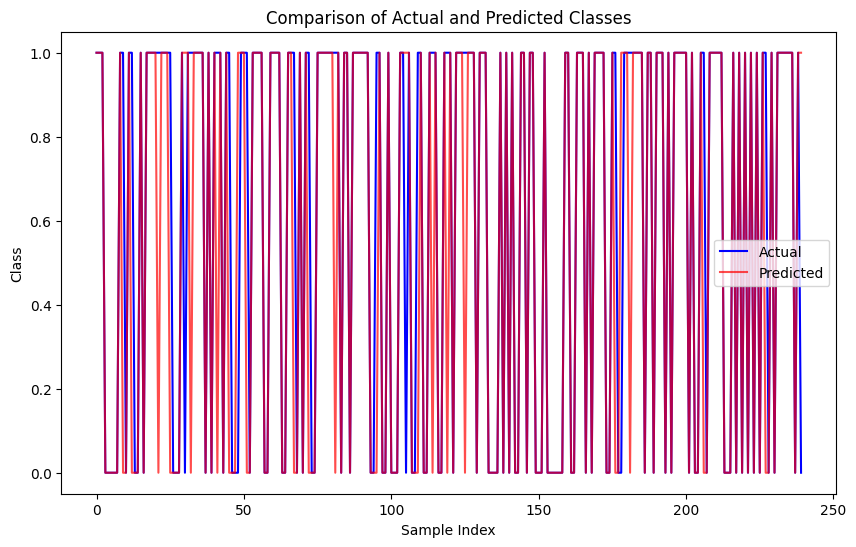

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(y_test[:245], 'b', label='Actual')
plt.plot(predicted_class[:245], 'r', alpha=0.7, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Comparison of Actual and Predicted Classes')
plt.legend()
plt.show()


In [38]:
import wandb
import numpy as np
from types import SimpleNamespace
import random

key = input('Enter your API:')
wandb.login(key=key)  #25c2257eaf6c22aa056893db14da4ee2bf0a531a

Enter your API:25c2257eaf6c22aa056893db14da4ee2bf0a531a


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\Partha Sakha Paul\.netrc


True

In [39]:
sweep_config = {
    'method': 'bayes',   #for bayes:
                            #ref: https://wandb.ai/wandb_fc/articles/reports/What-Is-Bayesian-Hyperparameter-Optimization-With-Tutorial---Vmlldzo1NDQyNzcw
    'name' : 'sweep final lstm finalize',
    'metric': {
      'name': 'val_accuracy',
      'goal': 'maximize'
    },
    'parameters': {
        'epochs': {
            'values': [5,10]
        },
        'n_steps':{
            'values':[30,40,50,60,70,80]
        },
        'lstm_activation': {
            'values': ['relu','tanh','sigmoid']
        },
        'batch_size': {
            'values': [32,64,128]
        },
        'optimizer':{
            'values':['sgd', 'rmsprop', 'adam', 'nadam']
        }
    }
}

sweep_id = wandb.sweep(sweep=sweep_config, project='modelling_workshop')

Create sweep with ID: puhtjzpe
Sweep URL: https://wandb.ai/parthasakhapaul/modelling_workshop/sweeps/puhtjzpe


In [40]:
def main():


    with wandb.init() as run:

        run_name="-ac_"+wandb.config.lstm_activation+"-epc_"+str(wandb.config.epochs)+"-n_steps-"+str(wandb.config.n_steps)+'batch_size'+str(wandb.config.batch_size)+'optimizer'+wandb.config.optimizer
        wandb.run.name=run_name
        model = create_lstm_model(n_steps=wandb.config.n_steps, num_features=12, num_lstm_layers=2, 
                         lstm_units=[50, 50], lstm_activation=wandb.config.lstm_activation, 
                         output_units=2, output_activation='softmax', 
                         optimizer=wandb.config.optimizer, learning_rate=0.01)
        history = model.fit(X_train, y_train_encoded, 
                            epochs=wandb.config.epochs,
                            batch_size=wandb.config.batch_size,
                            validation_split=0.2
                            )

        
        # Log the accuracy and other metrics after each epoch
        for epoch in range(wandb.config.epochs):
            wandb.log({"accuracy": history.history['accuracy'][epoch], 
                       "val_accuracy": history.history['val_accuracy'][epoch],
                       "loss": history.history['loss'][epoch],
                       "val_loss": history.history['val_loss'][epoch]}, step=epoch)



wandb.agent(sweep_id, function=main,count=100) # calls main function for count number of times.
wandb.finish()

wandb: Agent Starting Run: joq76uhy with config:
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 70
wandb: 	optimizer: sgd


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.5418 - loss: 0.7032 - val_accuracy: 0.5052 - val_loss: 0.7110
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.5380 - loss: 0.6960 - val_accuracy: 0.5052 - val_loss: 0.7041
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.5358 - loss: 0.6932 - val_accuracy: 0.5052 - val_loss: 0.7009
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.5285 - loss: 0.6932 - val_accuracy: 0.5052 - val_loss: 0.6998
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.5147 - loss: 0.6962 - val_accuracy: 0.5052 - val_loss: 0.6992
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.5477 - loss: 0.6889 - val_accuracy: 0.5052 - val_loss: 0.6986
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.5337 - loss: 0.6914 - val_accuracy: 0.5052 - val_loss: 0.6984
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.5226 - loss: 0.6935 - val_accuracy: 0.5052 - 

accuracy,▁▁▁▁▁▁▁▁▁▁
loss,█▃▂▁▁▁▁▁▁▁
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,█▄▂▂▂▁▁▁▁▁
accuracy,0.54167
loss,0.69013
val_accuracy,0.50521
val_loss,0.69817


wandb: Agent Starting Run: udd3oce5 with config:
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 50
wandb: 	optimizer: rmsprop


Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.5145 - loss: 0.7955 - val_accuracy: 0.4948 - val_loss: 0.7052
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.5397 - loss: 0.7031 - val_accuracy: 0.6302 - val_loss: 0.6471
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.6248 - loss: 0.6418 - val_accuracy: 0.5156 - val_loss: 0.6773
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6490 - loss: 0.6291 - val_accuracy: 0.7240 - val_loss: 0.5478
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.7258 - loss: 0.5634 - val_accuracy: 0.8229 - val_loss: 0.4748


accuracy,▁▂▅▇█
loss,█▆▄▂▁
val_accuracy,▁▄▁▆█
val_loss,█▆▇▃▁
accuracy,0.72786
loss,0.55345
val_accuracy,0.82292
val_loss,0.47485


wandb: Agent Starting Run: yo92dkvb with config:
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 60
wandb: 	optimizer: adam


Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.5512 - loss: 0.7172 - val_accuracy: 0.5052 - val_loss: 0.7835
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.5387 - loss: 0.7305 - val_accuracy: 0.5000 - val_loss: 0.6815
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.5705 - loss: 0.6585 - val_accuracy: 0.7500 - val_loss: 0.6095
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.7041 - loss: 0.5875 - val_accuracy: 0.7396 - val_loss: 0.5428
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.7455 - loss: 0.5243 - val_accuracy: 0.7917 - val_loss: 0.4803


accuracy,▂▁▄██
loss,██▅▂▁
val_accuracy,▁▁▇▇█
val_loss,█▆▄▂▁
accuracy,0.73828
loss,0.53296
val_accuracy,0.79167
val_loss,0.48026


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: sx09x0c6 with config:
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 50
wandb: 	optimizer: adam


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 263ms/step - accuracy: 0.5228 - loss: 0.7588 - val_accuracy: 0.4948 - val_loss: 0.6916
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.4916 - loss: 0.6971 - val_accuracy: 0.5052 - val_loss: 0.7043
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.5594 - loss: 0.6722 - val_accuracy: 0.5312 - val_loss: 0.6797
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.6327 - loss: 0.6563 - val_accuracy: 0.6250 - val_loss: 0.6465
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.7006 - loss: 0.6296 - val_accuracy: 0.7760 - val_loss: 0.6068
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.6960 - loss: 0.5815 - val_accuracy: 0.6615 - val_loss: 0.5808
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.7422 - loss: 0.5405 - val_accuracy: 0.7292 - val_loss: 0.5217
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.7350 - loss: 0.5410 - val_accuracy: 0.7865 - val_loss: 0.47

accuracy,▂▁▂▆▆▇████
loss,█▇▆▅▄▃▂▁▁▁
val_accuracy,▁▁▂▄▇▅▆█▆█
val_loss,██▇▆▅▄▃▁▂▁
accuracy,0.74219
loss,0.51989
val_accuracy,0.80208
val_loss,0.46381


wandb: Agent Starting Run: a2fj3vay with config:
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 50
wandb: 	optimizer: adam


Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.4956 - loss: 0.7774 - val_accuracy: 0.5052 - val_loss: 0.7387
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.4989 - loss: 0.7121 - val_accuracy: 0.6979 - val_loss: 0.6681
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.6327 - loss: 0.6490 - val_accuracy: 0.7917 - val_loss: 0.6177
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.7070 - loss: 0.6002 - val_accuracy: 0.8021 - val_loss: 0.5189
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.7219 - loss: 0.5480 - val_accuracy: 0.7552 - val_loss: 0.4828


accuracy,▁▁▄██
loss,█▆▄▂▁
val_accuracy,▁▆██▇
val_loss,█▆▅▂▁
accuracy,0.72266
loss,0.54587
val_accuracy,0.75521
val_loss,0.48284


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: c2muqfv2 with config:
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 70
wandb: 	optimizer: adam


Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.4928 - loss: 0.7677 - val_accuracy: 0.5052 - val_loss: 0.6870
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.5643 - loss: 0.6834 - val_accuracy: 0.5417 - val_loss: 0.6701
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.6003 - loss: 0.6524 - val_accuracy: 0.7656 - val_loss: 0.6060
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.6913 - loss: 0.6046 - val_accuracy: 0.7708 - val_loss: 0.5180
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.7198 - loss: 0.5419 - val_accuracy: 0.7917 - val_loss: 0.4766


accuracy,▁▃▆██
loss,█▆▅▂▁
val_accuracy,▁▂▇▇█
val_loss,█▇▅▂▁
accuracy,0.72526
loss,0.54256
val_accuracy,0.79167
val_loss,0.47665


wandb: Agent Starting Run: zlhl200r with config:
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: rmsprop


Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 230ms/step - accuracy: 0.4933 - loss: 0.9676 - val_accuracy: 0.4948 - val_loss: 0.6909
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.4803 - loss: 0.7018 - val_accuracy: 0.5052 - val_loss: 0.6976
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.5533 - loss: 0.6650 - val_accuracy: 0.6875 - val_loss: 0.6588
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.6232 - loss: 0.6392 - val_accuracy: 0.5208 - val_loss: 0.6315
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.6180 - loss: 0.6393 - val_accuracy: 0.8073 - val_loss: 0.5845


accuracy,▁▂▃█▇
loss,█▃▂▁▁
val_accuracy,▁▁▅▂█
val_loss,██▆▄▁
accuracy,0.6263
loss,0.63091
val_accuracy,0.80729
val_loss,0.58448


wandb: Agent Starting Run: lso73hsm with config:
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 50
wandb: 	optimizer: rmsprop


Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 274ms/step - accuracy: 0.4961 - loss: 1.0446 - val_accuracy: 0.5052 - val_loss: 0.6993
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.5627 - loss: 0.6850 - val_accuracy: 0.7656 - val_loss: 0.6774
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.6098 - loss: 0.6698 - val_accuracy: 0.7500 - val_loss: 0.6513
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.5977 - loss: 0.6447 - val_accuracy: 0.5104 - val_loss: 0.6543
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.6239 - loss: 0.6373 - val_accuracy: 0.7188 - val_loss: 0.5895


accuracy,▁▆▅▄█
loss,█▂▂▂▁
val_accuracy,▁██▁▇
val_loss,█▇▅▅▁
accuracy,0.65755
loss,0.61931
val_accuracy,0.71875
val_loss,0.58947


wandb: Agent Starting Run: s2str42u with config:
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 30
wandb: 	optimizer: adam


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 225ms/step - accuracy: 0.5115 - loss: 0.7546 - val_accuracy: 0.5052 - val_loss: 0.7789
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.5375 - loss: 0.7221 - val_accuracy: 0.5000 - val_loss: 0.6820
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.5499 - loss: 0.6854 - val_accuracy: 0.6458 - val_loss: 0.6769
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.6099 - loss: 0.6631 - val_accuracy: 0.5938 - val_loss: 0.6668
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.6379 - loss: 0.6379 - val_accuracy: 0.7760 - val_loss: 0.6250
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.7281 - loss: 0.6008 - val_accuracy: 0.7708 - val_loss: 0.5759
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.7296 - loss: 0.5553 - val_accuracy: 0.6719 - val_loss: 0.5650
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.7293 - loss: 0.5401 - val_accuracy: 0.7604 - val_loss: 0.508

accuracy,▁▂▄▃▅▇▇▇██
loss,█▇▆▆▅▄▃▂▁▁
val_accuracy,▁▁▅▃██▅▇██
val_loss,█▆▆▅▄▃▃▂▁▁
accuracy,0.75521
loss,0.50944
val_accuracy,0.78125
val_loss,0.48477


wandb: Agent Starting Run: ptkgdz7l with config:
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 50
wandb: 	optimizer: rmsprop


Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - accuracy: 0.5437 - loss: 0.9029 - val_accuracy: 0.5417 - val_loss: 0.6734
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.6525 - loss: 0.6764 - val_accuracy: 0.7812 - val_loss: 0.6136
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.6814 - loss: 0.6217 - val_accuracy: 0.7865 - val_loss: 0.5504
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6904 - loss: 0.5742 - val_accuracy: 0.5885 - val_loss: 0.6253
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7375 - loss: 0.5511 - val_accuracy: 0.7969 - val_loss: 0.4847


accuracy,▁▄▆▇█
loss,█▅▃▁▁
val_accuracy,▁██▂█
val_loss,█▆▃▆▁
accuracy,0.72396
loss,0.5501
val_accuracy,0.79688
val_loss,0.48473


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 8toodsom with config:
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: rmsprop


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 225ms/step - accuracy: 0.4884 - loss: 1.0483 - val_accuracy: 0.5052 - val_loss: 0.7473
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.5417 - loss: 0.7070 - val_accuracy: 0.7240 - val_loss: 0.6805
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.6293 - loss: 0.6732 - val_accuracy: 0.5052 - val_loss: 0.6970
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.5940 - loss: 0.6600 - val_accuracy: 0.7760 - val_loss: 0.6303
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.6910 - loss: 0.6113 - val_accuracy: 0.5885 - val_loss: 0.6443
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6744 - loss: 0.6053 - val_accuracy: 0.6719 - val_loss: 0.5717
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.6632 - loss: 0.6123 - val_accuracy: 0.7552 - val_loss: 0.5405
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.7469 - loss: 0.5338 - val_accuracy: 0.8229 - val_loss: 0.5100

accuracy,▁▁▃▃▅▇▅█▇█
loss,█▄▃▃▂▂▂▁▁▁
val_accuracy,▁▆▁▇▃▅▇█▄█
val_loss,█▆▇▅▅▃▂▁▃▁
accuracy,0.73698
loss,0.54976
val_accuracy,0.8125
val_loss,0.49535


wandb: Agent Starting Run: 1zempp1l with config:
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: rmsprop


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 230ms/step - accuracy: 0.4544 - loss: 1.0424 - val_accuracy: 0.5052 - val_loss: 0.6948
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.5502 - loss: 0.6747 - val_accuracy: 0.5208 - val_loss: 0.6842
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.5701 - loss: 0.6715 - val_accuracy: 0.7969 - val_loss: 0.6397
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.6703 - loss: 0.6387 - val_accuracy: 0.5312 - val_loss: 0.6323
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.6791 - loss: 0.6095 - val_accuracy: 0.7812 - val_loss: 0.5581
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.6714 - loss: 0.5934 - val_accuracy: 0.6094 - val_loss: 0.5961
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.7147 - loss: 0.5738 - val_accuracy: 0.7604 - val_loss: 0.5577
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.6717 - loss: 0.6124 - val_accuracy: 0.7604 - val_loss:

accuracy,▁▃▄▅▇▆▇▇██
loss,█▄▃▃▂▂▂▂▁▁
val_accuracy,▁▁█▂▇▃▇▇▆█
val_loss,██▆▆▃▄▃▁▂▁
accuracy,0.75
loss,0.51831
val_accuracy,0.80729
val_loss,0.50226


wandb: Agent Starting Run: yqnkcgyg with config:
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: rmsprop


Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 237ms/step - accuracy: 0.4879 - loss: 0.8691 - val_accuracy: 0.5052 - val_loss: 0.6975
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.5039 - loss: 0.6911 - val_accuracy: 0.5052 - val_loss: 0.6976
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.5398 - loss: 0.6805 - val_accuracy: 0.6198 - val_loss: 0.6624
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.6212 - loss: 0.6407 - val_accuracy: 0.7135 - val_loss: 0.6077
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.7009 - loss: 0.6071 - val_accuracy: 0.5104 - val_loss: 0.6664


accuracy,▁▃▅▇█
loss,█▃▂▁▁
val_accuracy,▁▁▅█▁
val_loss,██▅▁▆
accuracy,0.66797
loss,0.634
val_accuracy,0.51042
val_loss,0.66642


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: lv3oc9cx with config:
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 60
wandb: 	optimizer: adam


Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - accuracy: 0.5045 - loss: 0.7641 - val_accuracy: 0.6302 - val_loss: 0.6838
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.5228 - loss: 0.6863 - val_accuracy: 0.5312 - val_loss: 0.6697
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6014 - loss: 0.6423 - val_accuracy: 0.7604 - val_loss: 0.5961
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.7369 - loss: 0.5698 - val_accuracy: 0.7500 - val_loss: 0.5267
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.7343 - loss: 0.5327 - val_accuracy: 0.6979 - val_loss: 0.5439


accuracy,▁▂▅██
loss,█▆▄▂▁
val_accuracy,▄▁██▆
val_loss,█▇▄▁▂
accuracy,0.73958
loss,0.54048
val_accuracy,0.69792
val_loss,0.54392


wandb: Agent Starting Run: bdj3wtct with config:
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 60
wandb: 	optimizer: rmsprop


Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.5215 - loss: 0.8535 - val_accuracy: 0.5052 - val_loss: 0.7151
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.5852 - loss: 0.6762 - val_accuracy: 0.5260 - val_loss: 0.6621
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.6335 - loss: 0.6392 - val_accuracy: 0.8073 - val_loss: 0.5653
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.7212 - loss: 0.5660 - val_accuracy: 0.7760 - val_loss: 0.5205
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.7336 - loss: 0.5398 - val_accuracy: 0.8177 - val_loss: 0.4763


accuracy,▁▃▅▇█
loss,█▅▄▂▁
val_accuracy,▁▁█▇█
val_loss,█▆▄▂▁
accuracy,0.73177
loss,0.53999
val_accuracy,0.81771
val_loss,0.47631


wandb: Agent Starting Run: zp80w51l with config:
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 70
wandb: 	optimizer: adam


Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 155ms/step - accuracy: 0.4968 - loss: 0.7578 - val_accuracy: 0.5104 - val_loss: 0.6847
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.5879 - loss: 0.6741 - val_accuracy: 0.6667 - val_loss: 0.6556
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.6905 - loss: 0.6307 - val_accuracy: 0.7344 - val_loss: 0.5748
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.7231 - loss: 0.5455 - val_accuracy: 0.7552 - val_loss: 0.4962
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.7661 - loss: 0.5118 - val_accuracy: 0.7812 - val_loss: 0.4906


accuracy,▁▃▆▇█
loss,█▆▄▂▁
val_accuracy,▁▅▇▇█
val_loss,█▇▄▁▁
accuracy,0.7487
loss,0.52418
val_accuracy,0.78125
val_loss,0.49063


wandb: Agent Starting Run: 9db01udy with config:
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 70
wandb: 	optimizer: adam


Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - accuracy: 0.5423 - loss: 0.7764 - val_accuracy: 0.5052 - val_loss: 0.7544
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.5389 - loss: 0.7218 - val_accuracy: 0.5677 - val_loss: 0.6738
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.6119 - loss: 0.6627 - val_accuracy: 0.7552 - val_loss: 0.6289
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.6892 - loss: 0.6024 - val_accuracy: 0.7240 - val_loss: 0.5581
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.7408 - loss: 0.5389 - val_accuracy: 0.7083 - val_loss: 0.5378


accuracy,▁▁▅▇█
loss,█▇▅▃▁
val_accuracy,▁▃█▇▇
val_loss,█▅▄▂▁
accuracy,0.73828
loss,0.53996
val_accuracy,0.70833
val_loss,0.53782


wandb: Agent Starting Run: zgw7iahe with config:
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 60
wandb: 	optimizer: rmsprop


Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.5211 - loss: 0.8560 - val_accuracy: 0.5573 - val_loss: 0.6786
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.6054 - loss: 0.6617 - val_accuracy: 0.5260 - val_loss: 0.6855
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.6037 - loss: 0.6379 - val_accuracy: 0.7604 - val_loss: 0.5675
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.7250 - loss: 0.5647 - val_accuracy: 0.7240 - val_loss: 0.5471
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.7149 - loss: 0.5627 - val_accuracy: 0.6406 - val_loss: 0.5857


accuracy,▁▅▄██
loss,█▄▃▂▁
val_accuracy,▂▁█▇▄
val_loss,██▂▁▃
accuracy,0.72656
loss,0.55217
val_accuracy,0.64062
val_loss,0.5857


wandb: Agent Starting Run: dj5v0y7e with config:
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 50
wandb: 	optimizer: adam


Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.4755 - loss: 0.8671 - val_accuracy: 0.5052 - val_loss: 0.7582
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.5418 - loss: 0.7185 - val_accuracy: 0.6406 - val_loss: 0.6803
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.6256 - loss: 0.6759 - val_accuracy: 0.6667 - val_loss: 0.6542
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.6891 - loss: 0.6265 - val_accuracy: 0.7760 - val_loss: 0.5767
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.7288 - loss: 0.5666 - val_accuracy: 0.7448 - val_loss: 0.5203


accuracy,▁▃▅▇█
loss,█▅▄▃▁
val_accuracy,▁▅▅█▇
val_loss,█▆▅▃▁
accuracy,0.72786
loss,0.55192
val_accuracy,0.74479
val_loss,0.52034


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: b41l0sp8 with config:
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 50
wandb: 	optimizer: rmsprop


Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.5278 - loss: 0.8553 - val_accuracy: 0.5052 - val_loss: 0.7072
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.6389 - loss: 0.6748 - val_accuracy: 0.7917 - val_loss: 0.6170
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.6899 - loss: 0.5981 - val_accuracy: 0.7760 - val_loss: 0.5350
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.6882 - loss: 0.5666 - val_accuracy: 0.7188 - val_loss: 0.5495
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.7184 - loss: 0.5470 - val_accuracy: 0.8021 - val_loss: 0.4840


accuracy,▁▅▇▇█
loss,█▅▂▂▁
val_accuracy,▁█▇▆█
val_loss,█▅▃▃▁
accuracy,0.72266
loss,0.54693
val_accuracy,0.80208
val_loss,0.48396


wandb: Agent Starting Run: 3gt0r0qz with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: rmsprop


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.5185 - loss: 0.8709 - val_accuracy: 0.6927 - val_loss: 0.6291
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6243 - loss: 0.6281 - val_accuracy: 0.7760 - val_loss: 0.5333
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6884 - loss: 0.5766 - val_accuracy: 0.7604 - val_loss: 0.5113
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7377 - loss: 0.5435 - val_accuracy: 0.5990 - val_loss: 0.6625
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7552 - loss: 0.5031 - val_accuracy: 0.8125 - val_loss: 0.4629
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7673 - loss: 0.4715 - val_accuracy: 0.8542 - val_loss: 0.3924
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7831 - loss: 0.4562 - val_accuracy: 0.7083 - val_loss: 0.5183
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8225 - loss: 0.3866 - val_accuracy: 0.8646 - v

accuracy,▁▃▅▆▆▆▇▇██
loss,█▆▅▄▄▃▃▂▁▁
val_accuracy,▃▅▅▁▆▇▄███
val_loss,▇▆▅█▄▃▅▂▁▁
accuracy,0.83333
loss,0.34323
val_accuracy,0.86979
val_loss,0.2775


wandb: Agent Starting Run: 3pwx6p7a with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: rmsprop


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.4913 - loss: 0.8115 - val_accuracy: 0.7604 - val_loss: 0.6588
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6313 - loss: 0.6405 - val_accuracy: 0.5938 - val_loss: 0.5935
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7181 - loss: 0.5519 - val_accuracy: 0.7292 - val_loss: 0.5307
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7356 - loss: 0.5328 - val_accuracy: 0.8125 - val_loss: 0.4660
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7256 - loss: 0.5299 - val_accuracy: 0.8177 - val_loss: 0.4590
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7412 - loss: 0.5321 - val_accuracy: 0.8333 - val_loss: 0.3840
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7874 - loss: 0.4634 - val_accuracy: 0.8385 - val_loss: 0.3935
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7851 - loss: 0.4277 - val_accuracy: 0.8229 - v

accuracy,▁▄▆▆▆▇▇▇██
loss,█▆▅▄▄▄▃▂▁▁
val_accuracy,▅▁▄▆▇▇▇▇██
val_loss,█▇▆▅▄▃▃▃▃▁
accuracy,0.82682
loss,0.35016
val_accuracy,0.875
val_loss,0.27257


wandb: Agent Starting Run: j8ep3juc with config:
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 30
wandb: 	optimizer: adam


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 0.4952 - loss: 0.7567 - val_accuracy: 0.5104 - val_loss: 0.6845
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.5464 - loss: 0.6799 - val_accuracy: 0.5312 - val_loss: 0.6664
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.6077 - loss: 0.6406 - val_accuracy: 0.6302 - val_loss: 0.6133
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.7066 - loss: 0.5938 - val_accuracy: 0.7552 - val_loss: 0.5176
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.7438 - loss: 0.5222 - val_accuracy: 0.8125 - val_loss: 0.4544
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.7259 - loss: 0.5524 - val_accuracy: 0.8073 - val_loss: 0.4694
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.7662 - loss: 0.4891 - val_accuracy: 0.8333 - val_loss: 0.4396
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.7867 - loss: 0.4758 - val_accuracy: 0.8073 - 

accuracy,▁▃▄▆▆▆▇▇██
loss,█▇▆▅▄▄▃▃▂▁
val_accuracy,▁▁▄▆█▇█▇▇▆
val_loss,█▇▆▃▁▂▁▁▂▃
accuracy,0.8151
loss,0.4096
val_accuracy,0.74479
val_loss,0.49681


wandb: Agent Starting Run: co6d0xbd with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: rmsprop


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.5181 - loss: 0.8934 - val_accuracy: 0.6250 - val_loss: 0.6662
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6319 - loss: 0.6466 - val_accuracy: 0.6302 - val_loss: 0.5862
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6685 - loss: 0.6084 - val_accuracy: 0.6667 - val_loss: 0.5699
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7527 - loss: 0.5430 - val_accuracy: 0.6354 - val_loss: 0.6109
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7182 - loss: 0.5317 - val_accuracy: 0.8177 - val_loss: 0.4553
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7393 - loss: 0.5115 - val_accuracy: 0.8073 - val_loss: 0.4571
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7746 - loss: 0.4940 - val_accuracy: 0.8073 - val_loss: 0.4475
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7871 - loss: 0.4410 - val_accuracy: 0.8490 - v

accuracy,▁▄▅▆▆▆▇▇██
loss,█▆▅▄▄▃▃▂▁▁
val_accuracy,▁▁▂▁▆▆▆▇▅█
val_loss,█▇▆▇▄▄▄▃▅▁
accuracy,0.83333
loss,0.36565
val_accuracy,0.90625
val_loss,0.25463


wandb: Agent Starting Run: 1h7exp41 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 50
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.5267 - loss: 0.7442 - val_accuracy: 0.6823 - val_loss: 0.6668
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7085 - loss: 0.6407 - val_accuracy: 0.7396 - val_loss: 0.5541
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7169 - loss: 0.5531 - val_accuracy: 0.8125 - val_loss: 0.4969
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7188 - loss: 0.5339 - val_accuracy: 0.8021 - val_loss: 0.4723
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7462 - loss: 0.4997 - val_accuracy: 0.8021 - val_loss: 0.4655
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7988 - loss: 0.4563 - val_accuracy: 0.7448 - val_loss: 0.4959
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8167 - loss: 0.4018 - val_accuracy: 0.7708 - val_loss: 0.4647
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8404 - loss: 0.3492 - val_accuracy: 0.8490 - v

accuracy,▁▅▅▆▆▇▇███
loss,█▆▅▅▄▄▃▂▁▁
val_accuracy,▁▃▆▆▆▃▄▇▇█
val_loss,█▆▅▅▄▅▄▂▄▁
accuracy,0.84115
loss,0.31576
val_accuracy,0.86458
val_loss,0.27247


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: j32ahcdy with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.5475 - loss: 0.7156 - val_accuracy: 0.5052 - val_loss: 0.6771
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6121 - loss: 0.6517 - val_accuracy: 0.7812 - val_loss: 0.5410
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7052 - loss: 0.5589 - val_accuracy: 0.7969 - val_loss: 0.4624
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7394 - loss: 0.5240 - val_accuracy: 0.8073 - val_loss: 0.4525
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7549 - loss: 0.4953 - val_accuracy: 0.7812 - val_loss: 0.4629
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8274 - loss: 0.4002 - val_accuracy: 0.8542 - val_loss: 0.3127
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.8097 - loss: 0.3823 - val_accuracy: 0.8229 - val_loss: 0.3215
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8423 - loss: 0.3222 - val_accuracy: 0.8750 - v

accuracy,▁▃▅▅▅▆▇▇█▇
loss,█▇▅▅▄▃▂▂▁▁
val_accuracy,▁▆▇▇▆█▇███
val_loss,█▆▄▄▄▂▂▁▂▂
accuracy,0.87109
loss,0.27973
val_accuracy,0.85417
val_loss,0.33122


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 4592yqib with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 50
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.5129 - loss: 0.7656 - val_accuracy: 0.5052 - val_loss: 0.6887
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.5649 - loss: 0.6633 - val_accuracy: 0.7760 - val_loss: 0.5940
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7123 - loss: 0.5666 - val_accuracy: 0.7292 - val_loss: 0.5262
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7394 - loss: 0.5306 - val_accuracy: 0.7917 - val_loss: 0.4903
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7468 - loss: 0.5057 - val_accuracy: 0.8073 - val_loss: 0.4598
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7805 - loss: 0.4710 - val_accuracy: 0.8177 - val_loss: 0.4196
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7804 - loss: 0.4566 - val_accuracy: 0.8073 - val_loss: 0.4060
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8450 - loss: 0.3818 - val_accuracy: 0.8490 - v

accuracy,▁▃▅▆▆▆▆███
loss,█▇▅▅▄▄▃▂▁▁
val_accuracy,▁▇▆▇▇▇▇███
val_loss,█▆▅▄▃▂▂▁▂▂
accuracy,0.86719
loss,0.29245
val_accuracy,0.82812
val_loss,0.39826


wandb: Agent Starting Run: 70llus6m with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: rmsprop


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.5534 - loss: 0.7904 - val_accuracy: 0.6302 - val_loss: 0.6467
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6591 - loss: 0.6293 - val_accuracy: 0.5417 - val_loss: 0.6456
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7095 - loss: 0.5670 - val_accuracy: 0.7031 - val_loss: 0.5458
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7482 - loss: 0.5085 - val_accuracy: 0.8281 - val_loss: 0.4710
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7607 - loss: 0.4742 - val_accuracy: 0.8229 - val_loss: 0.4402
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7576 - loss: 0.5026 - val_accuracy: 0.7604 - val_loss: 0.4784
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8029 - loss: 0.4322 - val_accuracy: 0.8125 - val_loss: 0.4226
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8364 - loss: 0.3886 - val_accuracy: 0.7656 - v

accuracy,▁▄▅▆▆▆▇▇▇█
loss,█▆▅▄▄▃▃▂▂▁
val_accuracy,▃▁▄▇▇▆▇▆▇█
val_loss,██▆▅▄▅▄▄▂▁
accuracy,0.84115
loss,0.35353
val_accuracy,0.875
val_loss,0.28492


wandb: Agent Starting Run: cysgzggf with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.5632 - loss: 0.7010 - val_accuracy: 0.5312 - val_loss: 0.6609
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6390 - loss: 0.6273 - val_accuracy: 0.7656 - val_loss: 0.4792
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7224 - loss: 0.5477 - val_accuracy: 0.7812 - val_loss: 0.5123
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7392 - loss: 0.5245 - val_accuracy: 0.8229 - val_loss: 0.4279
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7592 - loss: 0.5269 - val_accuracy: 0.7917 - val_loss: 0.4916
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7735 - loss: 0.4765 - val_accuracy: 0.8229 - val_loss: 0.4054
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.8017 - loss: 0.4087 - val_accuracy: 0.8177 - val_loss: 0.3659
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.8358 - loss: 0.3425 - val_accuracy: 0.8333 - 

accuracy,▁▄▅▆▆▆▇▇██
loss,█▆▅▅▅▄▃▂▁▁
val_accuracy,▁▆▆▇▆▇▇▇█▇
val_loss,█▅▆▄▅▄▃▂▁▃
accuracy,0.86068
loss,0.31414
val_accuracy,0.83854
val_loss,0.36891


wandb: Agent Starting Run: 7mq62ujj with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 30
wandb: 	optimizer: rmsprop


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.5060 - loss: 0.8242 - val_accuracy: 0.5208 - val_loss: 0.6691
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6325 - loss: 0.6375 - val_accuracy: 0.5885 - val_loss: 0.6230
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7200 - loss: 0.5572 - val_accuracy: 0.7656 - val_loss: 0.5184
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7294 - loss: 0.5381 - val_accuracy: 0.7812 - val_loss: 0.4901
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7121 - loss: 0.5487 - val_accuracy: 0.7917 - val_loss: 0.4613
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.7645 - loss: 0.4800 - val_accuracy: 0.7865 - val_loss: 0.4779
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7685 - loss: 0.4791 - val_accuracy: 0.8125 - val_loss: 0.4320
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7804 - loss: 0.4514 - val_accuracy: 0.8594 - v

accuracy,▁▄▆▆▆▆▇▇██
loss,█▆▄▄▄▃▃▂▁▁
val_accuracy,▁▂▆▆▆▆▇▇▇█
val_loss,█▇▅▅▄▅▄▂▃▁
accuracy,0.82031
loss,0.38369
val_accuracy,0.88542
val_loss,0.28096


wandb: Agent Starting Run: he0k0kcu with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - accuracy: 0.5172 - loss: 0.7348 - val_accuracy: 0.5156 - val_loss: 0.6763
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.5907 - loss: 0.6513 - val_accuracy: 0.6979 - val_loss: 0.5847
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6837 - loss: 0.5770 - val_accuracy: 0.7917 - val_loss: 0.4911
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7499 - loss: 0.5284 - val_accuracy: 0.7292 - val_loss: 0.4976
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7809 - loss: 0.4821 - val_accuracy: 0.8177 - val_loss: 0.4409
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7809 - loss: 0.4672 - val_accuracy: 0.7656 - val_loss: 0.4637
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7739 - loss: 0.4397 - val_accuracy: 0.8698 - val_loss: 0.3591
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8267 - loss: 0.3632 - val_accuracy: 0.8802 - 

accuracy,▁▂▅▆▆▆▆▇██
loss,█▇▅▄▄▄▃▂▁▁
val_accuracy,▁▄▆▅▆▆▇██▇
val_loss,█▇▅▅▄▅▃▂▁▂
accuracy,0.84896
loss,0.32565
val_accuracy,0.86458
val_loss,0.25017


wandb: Agent Starting Run: o6tyhtne with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 30
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.5082 - loss: 0.7731 - val_accuracy: 0.4948 - val_loss: 0.6887
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5483 - loss: 0.6736 - val_accuracy: 0.7604 - val_loss: 0.6232
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7266 - loss: 0.5816 - val_accuracy: 0.7448 - val_loss: 0.5378
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7338 - loss: 0.5187 - val_accuracy: 0.7708 - val_loss: 0.4850
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7684 - loss: 0.5053 - val_accuracy: 0.8333 - val_loss: 0.4211
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7800 - loss: 0.4491 - val_accuracy: 0.7760 - val_loss: 0.4642
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8310 - loss: 0.4050 - val_accuracy: 0.8594 - val_loss: 0.3155
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8284 - loss: 0.3454 - val_accuracy: 0.8125 - v

accuracy,▁▂▅▅▆▆▇▇██
loss,█▇▅▅▄▄▃▂▁▁
val_accuracy,▁▆▆▆▇▆█▇██
val_loss,█▇▅▄▃▄▁▂▁▁
accuracy,0.8776
loss,0.28117
val_accuracy,0.86458
val_loss,0.29677


wandb: Agent Starting Run: gpsofy1f with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 30
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.5833 - loss: 0.6959 - val_accuracy: 0.7552 - val_loss: 0.6481
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7067 - loss: 0.6164 - val_accuracy: 0.7969 - val_loss: 0.4988
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7371 - loss: 0.5520 - val_accuracy: 0.7917 - val_loss: 0.4795
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7284 - loss: 0.5375 - val_accuracy: 0.7969 - val_loss: 0.4488
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7797 - loss: 0.4643 - val_accuracy: 0.8073 - val_loss: 0.4574
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8246 - loss: 0.4196 - val_accuracy: 0.8021 - val_loss: 0.4075
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8136 - loss: 0.3979 - val_accuracy: 0.8438 - val_loss: 0.3294
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8398 - loss: 0.3646 - val_accuracy: 0.9062 - v

accuracy,▁▃▅▅▅▆▇███
loss,█▆▅▅▄▃▂▂▁▁
val_accuracy,▁▃▃▃▃▃▅█▅█
val_loss,█▆▅▅▅▄▃▂▄▁
accuracy,0.85156
loss,0.29994
val_accuracy,0.90104
val_loss,0.18557


wandb: Agent Starting Run: z7kqhdb7 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 50
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.5249 - loss: 0.8265 - val_accuracy: 0.5104 - val_loss: 0.6815
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.5598 - loss: 0.6665 - val_accuracy: 0.7552 - val_loss: 0.6167
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.7492 - loss: 0.5782 - val_accuracy: 0.7865 - val_loss: 0.4849
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7309 - loss: 0.5267 - val_accuracy: 0.7760 - val_loss: 0.4786
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7846 - loss: 0.4890 - val_accuracy: 0.8021 - val_loss: 0.4673
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.8069 - loss: 0.4333 - val_accuracy: 0.7031 - val_loss: 0.5626
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8098 - loss: 0.4201 - val_accuracy: 0.8490 - val_loss: 0.3767
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.8320 - loss: 0.3680 - val_accuracy: 0.8229 - v

accuracy,▁▃▅▆▆▆▇██▇
loss,█▆▅▄▃▃▂▂▁▁
val_accuracy,▁▆▆▆▆▅▇▇█▆
val_loss,█▇▅▅▄▆▃▃▁▆
accuracy,0.83333
loss,0.33835
val_accuracy,0.79167
val_loss,0.54434


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 05m0jn4h with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - accuracy: 0.4866 - loss: 0.8019 - val_accuracy: 0.5052 - val_loss: 0.7092
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.5725 - loss: 0.6651 - val_accuracy: 0.6615 - val_loss: 0.6116
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6998 - loss: 0.5841 - val_accuracy: 0.7188 - val_loss: 0.5401
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7303 - loss: 0.5419 - val_accuracy: 0.8021 - val_loss: 0.4786
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7703 - loss: 0.4893 - val_accuracy: 0.8177 - val_loss: 0.4428
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7534 - loss: 0.4919 - val_accuracy: 0.7188 - val_loss: 0.5392
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7968 - loss: 0.4459 - val_accuracy: 0.8333 - val_loss: 0.3975
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8362 - loss: 0.4092 - val_accuracy: 0.8281 - 

accuracy,▁▃▅▆▆▆▇███
loss,█▆▅▄▄▄▃▂▂▁
val_accuracy,▁▄▅▇▇▅▇▇█▇
val_loss,█▆▅▄▃▅▂▂▁▂
accuracy,0.84505
loss,0.31949
val_accuracy,0.82812
val_loss,0.40715


wandb: Agent Starting Run: hw9clw3a with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.4994 - loss: 0.7757 - val_accuracy: 0.6406 - val_loss: 0.6799
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6660 - loss: 0.6503 - val_accuracy: 0.5625 - val_loss: 0.6448
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7421 - loss: 0.5524 - val_accuracy: 0.7656 - val_loss: 0.5035
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7344 - loss: 0.5258 - val_accuracy: 0.6979 - val_loss: 0.5445
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7651 - loss: 0.4965 - val_accuracy: 0.8229 - val_loss: 0.4372
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7379 - loss: 0.4884 - val_accuracy: 0.8438 - val_loss: 0.4077
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7955 - loss: 0.4226 - val_accuracy: 0.8281 - val_loss: 0.3585
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8559 - loss: 0.3290 - val_accuracy: 0.8490 - v

accuracy,▁▄▆▆▆▆▇███
loss,█▆▅▅▄▄▃▂▁▁
val_accuracy,▃▁▆▄▇█▇██▇
val_loss,█▇▅▆▄▃▂▁▁▁
accuracy,0.85417
loss,0.29966
val_accuracy,0.83333
val_loss,0.30139


wandb: Agent Starting Run: c3fx1mbe with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: rmsprop


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.5035 - loss: 0.9317 - val_accuracy: 0.4948 - val_loss: 0.7059
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.5935 - loss: 0.6413 - val_accuracy: 0.8125 - val_loss: 0.5184
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7186 - loss: 0.5604 - val_accuracy: 0.7083 - val_loss: 0.5423
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7311 - loss: 0.5700 - val_accuracy: 0.6354 - val_loss: 0.6124
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7281 - loss: 0.5218 - val_accuracy: 0.6615 - val_loss: 0.5785
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7647 - loss: 0.4855 - val_accuracy: 0.7917 - val_loss: 0.4620
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7610 - loss: 0.4735 - val_accuracy: 0.6562 - val_loss: 0.6037
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8033 - loss: 0.4174 - val_accuracy: 0.8438 - v

accuracy,▁▃▅▆▅▆▆▇██
loss,█▅▄▄▄▃▃▂▁▁
val_accuracy,▁▇▅▄▄▆▄▇██
val_loss,█▅▅▇▆▄▆▃▂▁
accuracy,0.84115
loss,0.34202
val_accuracy,0.875
val_loss,0.25059


wandb: Agent Starting Run: g9baenp6 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: rmsprop


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - accuracy: 0.5194 - loss: 0.8298 - val_accuracy: 0.5104 - val_loss: 0.6567
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6094 - loss: 0.6512 - val_accuracy: 0.7552 - val_loss: 0.5469
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6997 - loss: 0.5644 - val_accuracy: 0.8021 - val_loss: 0.4837
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7550 - loss: 0.5182 - val_accuracy: 0.7917 - val_loss: 0.5056
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7365 - loss: 0.5377 - val_accuracy: 0.8021 - val_loss: 0.4772
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7585 - loss: 0.4828 - val_accuracy: 0.8281 - val_loss: 0.4481
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7678 - loss: 0.4725 - val_accuracy: 0.7969 - val_loss: 0.4556
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7572 - loss: 0.4739 - val_accuracy: 0.7552 - 

accuracy,▁▃▅▆▆▆▇▇██
loss,█▆▅▄▄▃▃▂▁▁
val_accuracy,▁▆▇▇▇█▇▆▅▇
val_loss,█▄▂▃▂▁▁▂█▃
accuracy,0.83464
loss,0.36275
val_accuracy,0.78125
val_loss,0.50795


wandb: Agent Starting Run: dnlgb4qq with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 30
wandb: 	optimizer: nadam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.4928 - loss: 0.7433 - val_accuracy: 0.6042 - val_loss: 0.6618
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7124 - loss: 0.6268 - val_accuracy: 0.7969 - val_loss: 0.4971
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7290 - loss: 0.5557 - val_accuracy: 0.7812 - val_loss: 0.4890
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7112 - loss: 0.5673 - val_accuracy: 0.7760 - val_loss: 0.4767
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7484 - loss: 0.5167 - val_accuracy: 0.7552 - val_loss: 0.4995
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7539 - loss: 0.5074 - val_accuracy: 0.7969 - val_loss: 0.4377
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7761 - loss: 0.4612 - val_accuracy: 0.7865 - val_loss: 0.3947
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8261 - loss: 0.3527 - val_accuracy: 0.8542 - 

accuracy,▁▅▅▅▆▆▆▇██
loss,█▆▅▅▅▄▃▂▁▁
val_accuracy,▁▆▆▆▅▆▆█▇▇
val_loss,█▅▅▄▅▄▃▁▃▃
accuracy,0.86328
loss,0.29989
val_accuracy,0.81771
val_loss,0.37606


wandb: Agent Starting Run: du17z8y5 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 30
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.5423 - loss: 0.7730 - val_accuracy: 0.5521 - val_loss: 0.6709
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6294 - loss: 0.6580 - val_accuracy: 0.7812 - val_loss: 0.5686
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7223 - loss: 0.5599 - val_accuracy: 0.7708 - val_loss: 0.5202
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7218 - loss: 0.5729 - val_accuracy: 0.8177 - val_loss: 0.4758
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7504 - loss: 0.5119 - val_accuracy: 0.8177 - val_loss: 0.4418
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7806 - loss: 0.4976 - val_accuracy: 0.8229 - val_loss: 0.4379
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7964 - loss: 0.4316 - val_accuracy: 0.8333 - val_loss: 0.3691
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8348 - loss: 0.3515 - val_accuracy: 0.8698 - v

accuracy,▁▄▅▅▆▆▇▇██
loss,█▇▅▅▄▄▃▂▁▁
val_accuracy,▁▆▆▇▇▇▇███
val_loss,█▆▅▄▄▄▃▁▂▁
accuracy,0.86068
loss,0.31062
val_accuracy,0.85417
val_loss,0.28377


wandb: Agent Starting Run: xoi27mtx with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 30
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.5171 - loss: 0.7428 - val_accuracy: 0.5052 - val_loss: 0.6990
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.5741 - loss: 0.6655 - val_accuracy: 0.6458 - val_loss: 0.6148
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7023 - loss: 0.5821 - val_accuracy: 0.7604 - val_loss: 0.5011
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7473 - loss: 0.5224 - val_accuracy: 0.7500 - val_loss: 0.4981
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7724 - loss: 0.4855 - val_accuracy: 0.7917 - val_loss: 0.4639
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7761 - loss: 0.4785 - val_accuracy: 0.8021 - val_loss: 0.4537
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8199 - loss: 0.4067 - val_accuracy: 0.7760 - val_loss: 0.4922
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8272 - loss: 0.3773 - val_accuracy: 0.8594 - v

accuracy,▁▃▅▆▆▆▇▇██
loss,█▇▆▅▄▄▃▂▂▁
val_accuracy,▁▃▅▅▆▆▆▇▇█
val_loss,█▇▅▅▅▅▅▂▃▁
accuracy,0.8737
loss,0.28345
val_accuracy,0.91146
val_loss,0.19931


wandb: Agent Starting Run: s2ox8rh0 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 30
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.5458 - loss: 0.7048 - val_accuracy: 0.6250 - val_loss: 0.6609
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6667 - loss: 0.6235 - val_accuracy: 0.5781 - val_loss: 0.6504
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7286 - loss: 0.5545 - val_accuracy: 0.7500 - val_loss: 0.5029
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7503 - loss: 0.5221 - val_accuracy: 0.8229 - val_loss: 0.4544
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7512 - loss: 0.5231 - val_accuracy: 0.7708 - val_loss: 0.4829
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7599 - loss: 0.4824 - val_accuracy: 0.7865 - val_loss: 0.4488
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7945 - loss: 0.4194 - val_accuracy: 0.8438 - val_loss: 0.3540
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8346 - loss: 0.3685 - val_accuracy: 0.8802 - v

accuracy,▁▄▅▅▆▆▆▇██
loss,█▇▅▅▅▄▃▂▂▁
val_accuracy,▂▁▅▇▅▆▇██▆
val_loss,██▅▄▅▄▃▁▁▇
accuracy,0.875
loss,0.29623
val_accuracy,0.78125
val_loss,0.58582


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 2c8gh3lr with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: rmsprop


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.4999 - loss: 0.9663 - val_accuracy: 0.5938 - val_loss: 0.6603
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.6591 - loss: 0.6411 - val_accuracy: 0.8021 - val_loss: 0.5449
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7019 - loss: 0.5744 - val_accuracy: 0.7656 - val_loss: 0.5011
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7351 - loss: 0.5330 - val_accuracy: 0.7552 - val_loss: 0.5214
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7244 - loss: 0.5416 - val_accuracy: 0.8177 - val_loss: 0.4498
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7713 - loss: 0.4988 - val_accuracy: 0.8125 - val_loss: 0.4347
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.7639 - loss: 0.4760 - val_accuracy: 0.7865 - val_loss: 0.4243
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8059 - loss: 0.4019 - val_accuracy: 0.8854 - 

accuracy,▁▄▅▆▆▇▆▇██
loss,█▅▄▄▄▃▃▂▁▁
val_accuracy,▁▅▅▄▆▆▅▇█▇
val_loss,█▆▆▆▅▅▄▂▁▂
accuracy,0.84115
loss,0.34712
val_accuracy,0.85938
val_loss,0.27991


wandb: Agent Starting Run: y49yendu with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 30
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.5144 - loss: 0.7485 - val_accuracy: 0.5833 - val_loss: 0.6800
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.6750 - loss: 0.6589 - val_accuracy: 0.7552 - val_loss: 0.5736
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7192 - loss: 0.5481 - val_accuracy: 0.7604 - val_loss: 0.5061
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7557 - loss: 0.5083 - val_accuracy: 0.7031 - val_loss: 0.5402
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7462 - loss: 0.5497 - val_accuracy: 0.7552 - val_loss: 0.4960
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7866 - loss: 0.4602 - val_accuracy: 0.7396 - val_loss: 0.5212
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7888 - loss: 0.4129 - val_accuracy: 0.8021 - val_loss: 0.4396
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8457 - loss: 0.3530 - val_accuracy: 0.7448 - v

accuracy,▁▄▅▅▆▆▆▇██
loss,█▇▅▅▅▄▃▂▂▁
val_accuracy,▁▇▇▅▇▆█▆▅▅
val_loss,▆▄▂▃▂▃▁▂▄█
accuracy,0.8776
loss,0.27633
val_accuracy,0.70833
val_loss,0.78192


wandb: Agent Starting Run: 20rlzkgd with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: rmsprop


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.5452 - loss: 0.7887 - val_accuracy: 0.4948 - val_loss: 0.7397
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5926 - loss: 0.6632 - val_accuracy: 0.7396 - val_loss: 0.5531
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7067 - loss: 0.5787 - val_accuracy: 0.8021 - val_loss: 0.4780
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7133 - loss: 0.5457 - val_accuracy: 0.6771 - val_loss: 0.5634
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7160 - loss: 0.5545 - val_accuracy: 0.6979 - val_loss: 0.5355
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7965 - loss: 0.4580 - val_accuracy: 0.6719 - val_loss: 0.5802
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7879 - loss: 0.4623 - val_accuracy: 0.7604 - val_loss: 0.4905
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8192 - loss: 0.3889 - val_accuracy: 0.8438 - v

accuracy,▁▃▅▅▆▇▇███
loss,█▆▅▄▄▃▃▂▁▁
val_accuracy,▁▅▆▄▄▄▅▇█▇
val_loss,█▅▄▆▅▆▄▂▁▁
accuracy,0.82812
loss,0.33831
val_accuracy,0.86979
val_loss,0.26034


wandb: Agent Starting Run: 47oezp1o with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.4866 - loss: 0.7483 - val_accuracy: 0.5625 - val_loss: 0.6680
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6341 - loss: 0.6276 - val_accuracy: 0.6146 - val_loss: 0.5946
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7231 - loss: 0.5388 - val_accuracy: 0.7865 - val_loss: 0.4974
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7495 - loss: 0.5112 - val_accuracy: 0.7604 - val_loss: 0.4872
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7535 - loss: 0.5034 - val_accuracy: 0.8125 - val_loss: 0.4473
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7692 - loss: 0.4772 - val_accuracy: 0.8021 - val_loss: 0.4258
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8187 - loss: 0.3971 - val_accuracy: 0.8281 - val_loss: 0.3856
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8303 - loss: 0.3586 - val_accuracy: 0.9010 - v

accuracy,▁▄▅▆▆▆▇▇██
loss,█▇▅▅▄▄▃▂▁▁
val_accuracy,▁▂▆▅▆▆▆█▇▇
val_loss,█▇▅▅▄▄▃▁▃▃
accuracy,0.8724
loss,0.29369
val_accuracy,0.85417
val_loss,0.34837


wandb: Agent Starting Run: 4n3i27hw with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: rmsprop


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.5812 - loss: 0.8099 - val_accuracy: 0.7344 - val_loss: 0.6452
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6605 - loss: 0.6288 - val_accuracy: 0.7917 - val_loss: 0.5417
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.6686 - loss: 0.6017 - val_accuracy: 0.8333 - val_loss: 0.4735
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6807 - loss: 0.5858 - val_accuracy: 0.8333 - val_loss: 0.4587
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7485 - loss: 0.5372 - val_accuracy: 0.5833 - val_loss: 0.6754
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7294 - loss: 0.5371 - val_accuracy: 0.8229 - val_loss: 0.4487
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7464 - loss: 0.4964 - val_accuracy: 0.8125 - val_loss: 0.4376
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7865 - loss: 0.4488 - val_accuracy: 0.8021 - v

accuracy,▁▃▅▅▆▆▇▇██
loss,█▆▅▄▄▄▃▂▁▁
val_accuracy,▅▆▇▇▁▇▇▇▇█
val_loss,▇▅▄▄█▄▃▃▃▁
accuracy,0.80859
loss,0.39207
val_accuracy,0.85417
val_loss,0.32166


wandb: Agent Starting Run: tpdns84g with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: rmsprop


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.5177 - loss: 0.8547 - val_accuracy: 0.5365 - val_loss: 0.6536
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6221 - loss: 0.6250 - val_accuracy: 0.7917 - val_loss: 0.5270
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6796 - loss: 0.5841 - val_accuracy: 0.7344 - val_loss: 0.5324
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.7453 - loss: 0.5341 - val_accuracy: 0.7812 - val_loss: 0.4787
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7402 - loss: 0.5186 - val_accuracy: 0.8281 - val_loss: 0.4535
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7556 - loss: 0.4987 - val_accuracy: 0.8229 - val_loss: 0.4167
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.7828 - loss: 0.4589 - val_accuracy: 0.7969 - val_loss: 0.4350
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.7821 - loss: 0.4247 - val_accuracy: 0.7969 - v

accuracy,▁▄▅▆▆▆▇▇██
loss,█▅▅▄▄▃▃▂▁▁
val_accuracy,▁▆▅▆▇▇▆▆██
val_loss,█▆▆▅▅▄▄▄▃▁
accuracy,0.83854
loss,0.35226
val_accuracy,0.88021
val_loss,0.22027


wandb: Agent Starting Run: 24yzvvnt with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 30
wandb: 	optimizer: rmsprop


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.5071 - loss: 0.8131 - val_accuracy: 0.5052 - val_loss: 0.7430
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.6211 - loss: 0.6504 - val_accuracy: 0.5990 - val_loss: 0.5947
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7142 - loss: 0.5666 - val_accuracy: 0.8073 - val_loss: 0.4840
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.7325 - loss: 0.5379 - val_accuracy: 0.7656 - val_loss: 0.5003
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7679 - loss: 0.4813 - val_accuracy: 0.7656 - val_loss: 0.4913
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7514 - loss: 0.5200 - val_accuracy: 0.8125 - val_loss: 0.4430
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7943 - loss: 0.4665 - val_accuracy: 0.8333 - val_loss: 0.4207
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7814 - loss: 0.4390 - val_accuracy: 0.8021 - v

accuracy,▁▄▅▆▆▆▇▇██
loss,█▆▅▅▄▄▃▂▂▁
val_accuracy,▁▃▇▆▆▇▇▇██
val_loss,█▆▄▄▄▄▃▃▁▁
accuracy,0.83333
loss,0.3381
val_accuracy,0.85417
val_loss,0.26098


wandb: Agent Starting Run: lpzz9pk6 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 30
wandb: 	optimizer: rmsprop


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.5341 - loss: 0.8715 - val_accuracy: 0.5000 - val_loss: 0.6836
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6436 - loss: 0.6203 - val_accuracy: 0.8073 - val_loss: 0.5171
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6870 - loss: 0.5807 - val_accuracy: 0.7552 - val_loss: 0.4898
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7295 - loss: 0.5534 - val_accuracy: 0.7812 - val_loss: 0.4824
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7473 - loss: 0.5220 - val_accuracy: 0.8125 - val_loss: 0.4389
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7674 - loss: 0.4813 - val_accuracy: 0.8021 - val_loss: 0.4525
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8069 - loss: 0.4476 - val_accuracy: 0.8021 - val_loss: 0.4370
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8396 - loss: 0.4136 - val_accuracy: 0.8490 - v

accuracy,▁▄▅▅▆▆▇▇▇█
loss,█▆▅▅▄▄▃▂▂▁
val_accuracy,▁▇▆▇▇▇▇███
val_loss,█▅▄▄▃▄▃▂▁▁
accuracy,0.84766
loss,0.34033
val_accuracy,0.83854
val_loss,0.30549


wandb: Agent Starting Run: y7pe0i1k with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: rmsprop


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.5362 - loss: 0.8331 - val_accuracy: 0.5104 - val_loss: 0.6556
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.6416 - loss: 0.6308 - val_accuracy: 0.7031 - val_loss: 0.5658
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7198 - loss: 0.5716 - val_accuracy: 0.8177 - val_loss: 0.4770
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7296 - loss: 0.5467 - val_accuracy: 0.6667 - val_loss: 0.5688
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7589 - loss: 0.5132 - val_accuracy: 0.6979 - val_loss: 0.5452
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7690 - loss: 0.4857 - val_accuracy: 0.8333 - val_loss: 0.4496
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7653 - loss: 0.4721 - val_accuracy: 0.8021 - val_loss: 0.4596
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7981 - loss: 0.4424 - val_accuracy: 0.7969 - v

accuracy,▁▄▅▆▆▆▆▇██
loss,█▅▅▄▄▄▃▃▁▁
val_accuracy,▁▅▇▄▅█▇▇██
val_loss,█▆▅▆▆▄▅▄▂▁
accuracy,0.82812
loss,0.36463
val_accuracy,0.85417
val_loss,0.25692


wandb: Agent Starting Run: p9sn6g9i with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 50
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.5034 - loss: 0.7417 - val_accuracy: 0.5104 - val_loss: 0.6846
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.5622 - loss: 0.6751 - val_accuracy: 0.6406 - val_loss: 0.6340
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7160 - loss: 0.5987 - val_accuracy: 0.7552 - val_loss: 0.5190
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7412 - loss: 0.5310 - val_accuracy: 0.7760 - val_loss: 0.4922
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7376 - loss: 0.5092 - val_accuracy: 0.8125 - val_loss: 0.4472
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7577 - loss: 0.4832 - val_accuracy: 0.7969 - val_loss: 0.4490
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8316 - loss: 0.4017 - val_accuracy: 0.8385 - val_loss: 0.3623
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8387 - loss: 0.3661 - val_accuracy: 0.8490 - v

accuracy,▁▃▅▆▆▆▇▇▇█
loss,█▇▅▅▄▄▃▂▂▁
val_accuracy,▁▃▆▆▇▆▇▇█▇
val_loss,█▇▅▅▄▄▂▂▁▄
accuracy,0.8737
loss,0.28775
val_accuracy,0.82812
val_loss,0.46297


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: i0ri6b7u with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: rmsprop


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.5363 - loss: 0.7712 - val_accuracy: 0.6979 - val_loss: 0.6370
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.6423 - loss: 0.6391 - val_accuracy: 0.7240 - val_loss: 0.5492
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.7361 - loss: 0.5432 - val_accuracy: 0.6302 - val_loss: 0.6149
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7171 - loss: 0.5464 - val_accuracy: 0.8073 - val_loss: 0.4733
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7352 - loss: 0.5350 - val_accuracy: 0.8125 - val_loss: 0.4440
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.7735 - loss: 0.4790 - val_accuracy: 0.7865 - val_loss: 0.4800
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.7874 - loss: 0.4613 - val_accuracy: 0.8229 - val_loss: 0.3996
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8022 - loss: 0.4157 - val_accuracy: 0.7604 - 

accuracy,▁▄▅▅▆▆▇▇██
loss,█▆▅▅▄▄▃▂▁▁
val_accuracy,▃▄▁▇█▇█▆▆█
val_loss,█▆▇▄▃▄▂▅▅▁
accuracy,0.83984
loss,0.35005
val_accuracy,0.82292
val_loss,0.3519


wandb: Agent Starting Run: 9ta15o37 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: rmsprop


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.4819 - loss: 0.8313 - val_accuracy: 0.7865 - val_loss: 0.6504
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6617 - loss: 0.6335 - val_accuracy: 0.6771 - val_loss: 0.5660
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7317 - loss: 0.5455 - val_accuracy: 0.8073 - val_loss: 0.4959
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7386 - loss: 0.5264 - val_accuracy: 0.8021 - val_loss: 0.4733
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7615 - loss: 0.5025 - val_accuracy: 0.7500 - val_loss: 0.5025
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7653 - loss: 0.5258 - val_accuracy: 0.8021 - val_loss: 0.4708
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7645 - loss: 0.4612 - val_accuracy: 0.8490 - val_loss: 0.3801
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7662 - loss: 0.4595 - val_accuracy: 0.8594 - v

accuracy,▁▅▆▆▆▇▇▇██
loss,█▆▅▄▄▄▃▂▁▁
val_accuracy,▅▁▅▅▄▅▇▇▇█
val_loss,█▆▅▅▅▅▃▂▂▁
accuracy,0.82422
loss,0.37354
val_accuracy,0.88021
val_loss,0.27057


wandb: Agent Starting Run: z2nnwk3x with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.5247 - loss: 0.7284 - val_accuracy: 0.6198 - val_loss: 0.6602
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6649 - loss: 0.6283 - val_accuracy: 0.7552 - val_loss: 0.5226
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7339 - loss: 0.5289 - val_accuracy: 0.7604 - val_loss: 0.5058
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7406 - loss: 0.5092 - val_accuracy: 0.8229 - val_loss: 0.4525
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7766 - loss: 0.4887 - val_accuracy: 0.7969 - val_loss: 0.4248
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8212 - loss: 0.4098 - val_accuracy: 0.8073 - val_loss: 0.3939
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8299 - loss: 0.3600 - val_accuracy: 0.8177 - val_loss: 0.3671
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8093 - loss: 0.3593 - val_accuracy: 0.8594 - v

accuracy,▁▄▅▅▆▆▇▇▇█
loss,█▆▆▅▅▄▃▂▂▁
val_accuracy,▁▄▅▆▆▆▆▇██
val_loss,█▆▅▅▄▄▃▁▁▁
accuracy,0.88672
loss,0.26648
val_accuracy,0.88542
val_loss,0.23858


wandb: Agent Starting Run: m4j8bpsv with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.5349 - loss: 0.7140 - val_accuracy: 0.5833 - val_loss: 0.6642
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6431 - loss: 0.6281 - val_accuracy: 0.5990 - val_loss: 0.6084
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7235 - loss: 0.5379 - val_accuracy: 0.6562 - val_loss: 0.5661
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7410 - loss: 0.5508 - val_accuracy: 0.8125 - val_loss: 0.4668
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7587 - loss: 0.4972 - val_accuracy: 0.8021 - val_loss: 0.4686
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7934 - loss: 0.4323 - val_accuracy: 0.7604 - val_loss: 0.4789
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8205 - loss: 0.4042 - val_accuracy: 0.7917 - val_loss: 0.4179
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.8546 - loss: 0.3704 - val_accuracy: 0.8385 - v

accuracy,▁▄▅▅▆▆▇███
loss,█▆▅▅▄▄▃▂▁▁
val_accuracy,▁▁▃▇▆▅▆▇█▇
val_loss,█▇▆▄▄▄▃▂▁▂
accuracy,0.86458
loss,0.30893
val_accuracy,0.82812
val_loss,0.3411


wandb: Agent Starting Run: e55wx1oy with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 30
wandb: 	optimizer: rmsprop


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.5278 - loss: 0.7997 - val_accuracy: 0.6562 - val_loss: 0.6376
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6644 - loss: 0.6184 - val_accuracy: 0.8177 - val_loss: 0.5231
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7184 - loss: 0.5641 - val_accuracy: 0.8125 - val_loss: 0.4655
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7502 - loss: 0.5130 - val_accuracy: 0.7656 - val_loss: 0.4791
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7371 - loss: 0.5118 - val_accuracy: 0.7917 - val_loss: 0.4685
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7654 - loss: 0.4886 - val_accuracy: 0.7500 - val_loss: 0.4656
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7743 - loss: 0.4618 - val_accuracy: 0.7083 - val_loss: 0.5316
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.8244 - loss: 0.3952 - val_accuracy: 0.7760 - v

accuracy,▁▄▆▆▆▇▇▇██
loss,█▆▅▄▄▃▃▂▁▁
val_accuracy,▁▇▇▅▆▅▃▅██
val_loss,█▆▄▅▄▄▆▄▁▁
accuracy,0.83333
loss,0.35111
val_accuracy,0.83854
val_loss,0.3108


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: xwx8tbaz with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.5031 - loss: 0.7851 - val_accuracy: 0.5052 - val_loss: 0.6849
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.5714 - loss: 0.6664 - val_accuracy: 0.7396 - val_loss: 0.6229
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7279 - loss: 0.5766 - val_accuracy: 0.7865 - val_loss: 0.4875
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7505 - loss: 0.5287 - val_accuracy: 0.7812 - val_loss: 0.4947
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7613 - loss: 0.4905 - val_accuracy: 0.7760 - val_loss: 0.4699
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7537 - loss: 0.4895 - val_accuracy: 0.7292 - val_loss: 0.5124
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8137 - loss: 0.4285 - val_accuracy: 0.7812 - val_loss: 0.4728
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8363 - loss: 0.3641 - val_accuracy: 0.8073 - v

accuracy,▁▃▅▅▆▆▇▇▇█
loss,█▇▅▅▄▄▃▂▂▁
val_accuracy,▁▆▇▇▇▆▇▇██
val_loss,█▇▄▄▄▅▄▃▂▁
accuracy,0.86849
loss,0.31449
val_accuracy,0.84896
val_loss,0.32429


wandb: Agent Starting Run: obgpvsc8 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.5324 - loss: 0.7088 - val_accuracy: 0.7500 - val_loss: 0.6629
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6599 - loss: 0.6246 - val_accuracy: 0.6979 - val_loss: 0.5521
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7568 - loss: 0.5309 - val_accuracy: 0.8177 - val_loss: 0.4809
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7396 - loss: 0.5302 - val_accuracy: 0.8385 - val_loss: 0.4443
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7341 - loss: 0.5300 - val_accuracy: 0.8125 - val_loss: 0.4469
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7599 - loss: 0.4680 - val_accuracy: 0.8542 - val_loss: 0.3769
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8527 - loss: 0.3684 - val_accuracy: 0.8333 - val_loss: 0.3328
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8347 - loss: 0.3263 - val_accuracy: 0.8646 - v

accuracy,▁▃▅▅▅▆▇▇█▇
loss,█▆▅▅▄▃▂▂▁▁
val_accuracy,▃▁▅▆▅▆▅▆██
val_loss,█▆▅▅▅▄▃▂▁▁
accuracy,0.84896
loss,0.32102
val_accuracy,0.91146
val_loss,0.22255


wandb: Agent Starting Run: 6zb60ccs with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: rmsprop


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.5739 - loss: 0.8379 - val_accuracy: 0.5312 - val_loss: 0.6581
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6213 - loss: 0.6481 - val_accuracy: 0.7448 - val_loss: 0.5640
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7086 - loss: 0.5742 - val_accuracy: 0.7865 - val_loss: 0.5002
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7235 - loss: 0.5402 - val_accuracy: 0.7917 - val_loss: 0.4987
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7543 - loss: 0.5142 - val_accuracy: 0.8177 - val_loss: 0.4558
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7719 - loss: 0.4824 - val_accuracy: 0.6927 - val_loss: 0.5297
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7391 - loss: 0.4838 - val_accuracy: 0.8594 - val_loss: 0.3757
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7928 - loss: 0.4260 - val_accuracy: 0.8854 - v

accuracy,▁▃▅▅▆▆▆▇██
loss,█▆▅▄▄▃▃▂▁▁
val_accuracy,▁▅▆▆▇▄▇█▇▇
val_loss,█▆▅▅▄▅▂▁▂▂
accuracy,0.83073
loss,0.35404
val_accuracy,0.82292
val_loss,0.37862


wandb: Agent Starting Run: ly2hs46f with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.5061 - loss: 0.7187 - val_accuracy: 0.5052 - val_loss: 0.6980
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5883 - loss: 0.6562 - val_accuracy: 0.6250 - val_loss: 0.6014
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7096 - loss: 0.5879 - val_accuracy: 0.8073 - val_loss: 0.4915
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7104 - loss: 0.5567 - val_accuracy: 0.7031 - val_loss: 0.5248
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8098 - loss: 0.4612 - val_accuracy: 0.7656 - val_loss: 0.4906
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7987 - loss: 0.4538 - val_accuracy: 0.8385 - val_loss: 0.3796
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8312 - loss: 0.3719 - val_accuracy: 0.8385 - val_loss: 0.3218
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8597 - loss: 0.3163 - val_accuracy: 0.8906 - v

accuracy,▁▃▅▅▆▆▇▇▇█
loss,█▇▆▅▅▄▃▂▂▁
val_accuracy,▁▃▆▅▆▇▇█▇█
val_loss,█▇▅▆▅▄▃▂▃▁
accuracy,0.88021
loss,0.26566
val_accuracy,0.89583
val_loss,0.20021


wandb: Agent Starting Run: loszegja with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - accuracy: 0.5020 - loss: 0.7178 - val_accuracy: 0.7188 - val_loss: 0.6563
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7036 - loss: 0.6217 - val_accuracy: 0.7917 - val_loss: 0.4903
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7332 - loss: 0.5308 - val_accuracy: 0.7708 - val_loss: 0.5153
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7044 - loss: 0.5597 - val_accuracy: 0.6875 - val_loss: 0.5323
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7333 - loss: 0.5319 - val_accuracy: 0.8073 - val_loss: 0.4668
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7887 - loss: 0.4501 - val_accuracy: 0.7865 - val_loss: 0.4320
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8004 - loss: 0.4149 - val_accuracy: 0.8125 - val_loss: 0.4023
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8396 - loss: 0.3467 - val_accuracy: 0.8073 - v

accuracy,▁▅▅▅▅▆▇▇██
loss,█▆▆▅▅▄▃▂▂▁
val_accuracy,▂▅▄▁▅▅▆▅▆█
val_loss,█▅▆▆▅▄▄▃▂▁
accuracy,0.8776
loss,0.26845
val_accuracy,0.88021
val_loss,0.25367


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: u3kd602d with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.5884 - loss: 0.7310 - val_accuracy: 0.5312 - val_loss: 0.6791
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.6210 - loss: 0.6654 - val_accuracy: 0.7604 - val_loss: 0.6037
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7084 - loss: 0.5834 - val_accuracy: 0.6562 - val_loss: 0.5760
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.7431 - loss: 0.5218 - val_accuracy: 0.8021 - val_loss: 0.4920
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7580 - loss: 0.5093 - val_accuracy: 0.8229 - val_loss: 0.4507
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.7714 - loss: 0.4900 - val_accuracy: 0.7969 - val_loss: 0.4601
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7725 - loss: 0.4523 - val_accuracy: 0.7917 - val_loss: 0.4405
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.8090 - loss: 0.4130 - val_accuracy: 0.8594 - v

accuracy,▁▃▅▅▅▆▆▇██
loss,█▇▅▅▅▄▄▃▂▁
val_accuracy,▁▅▃▆▇▆▆▇▇█
val_loss,█▇▆▅▄▄▄▃▂▁
accuracy,0.85807
loss,0.29777
val_accuracy,0.89062
val_loss,0.2473


wandb: Agent Starting Run: 2ra3odw4 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 50
wandb: 	optimizer: nadam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - accuracy: 0.5367 - loss: 0.7043 - val_accuracy: 0.5104 - val_loss: 0.6813
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.6442 - loss: 0.6146 - val_accuracy: 0.7344 - val_loss: 0.5287
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.7270 - loss: 0.5464 - val_accuracy: 0.8021 - val_loss: 0.4654
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.7250 - loss: 0.5591 - val_accuracy: 0.7135 - val_loss: 0.5275
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.7467 - loss: 0.4861 - val_accuracy: 0.8177 - val_loss: 0.4239
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7955 - loss: 0.4349 - val_accuracy: 0.8333 - val_loss: 0.3693
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.8346 - loss: 0.3574 - val_accuracy: 0.8646 - val_loss: 0.2756
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8454 - loss: 0.3082 - val_accuracy: 0.8385 - 

accuracy,▁▄▅▅▆▆▇▇▇█
loss,█▆▅▅▄▃▂▂▂▁
val_accuracy,▁▅▇▅▇▇█▇██
val_loss,█▅▄▅▄▃▁▂▁▂
accuracy,0.88151
loss,0.27578
val_accuracy,0.85417
val_loss,0.31394


wandb: Agent Starting Run: nacmvlvc with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 50
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.4778 - loss: 0.7459 - val_accuracy: 0.5052 - val_loss: 0.6812
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.5903 - loss: 0.6612 - val_accuracy: 0.7656 - val_loss: 0.5789
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7326 - loss: 0.5627 - val_accuracy: 0.7708 - val_loss: 0.4885
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7609 - loss: 0.5228 - val_accuracy: 0.8021 - val_loss: 0.4826
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7714 - loss: 0.5066 - val_accuracy: 0.8073 - val_loss: 0.4444
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8028 - loss: 0.4293 - val_accuracy: 0.7656 - val_loss: 0.4843
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8504 - loss: 0.3873 - val_accuracy: 0.8594 - val_loss: 0.3464
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8298 - loss: 0.3667 - val_accuracy: 0.8542 - v

accuracy,▁▄▅▆▆▆▇▇██
loss,█▇▅▅▄▄▃▂▁▁
val_accuracy,▁▆▆▇▇▆███▇
val_loss,█▆▄▄▄▄▂▁▁▃
accuracy,0.86849
loss,0.28894
val_accuracy,0.8125
val_loss,0.4019


wandb: Agent Starting Run: ahf4nztq with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: rmsprop


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.5470 - loss: 0.8848 - val_accuracy: 0.5000 - val_loss: 0.6662
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6127 - loss: 0.6426 - val_accuracy: 0.7865 - val_loss: 0.5383
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7191 - loss: 0.5606 - val_accuracy: 0.8021 - val_loss: 0.4793
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7413 - loss: 0.5186 - val_accuracy: 0.7917 - val_loss: 0.4706
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7819 - loss: 0.4874 - val_accuracy: 0.8177 - val_loss: 0.4703
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7881 - loss: 0.4635 - val_accuracy: 0.8021 - val_loss: 0.4590
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7796 - loss: 0.4537 - val_accuracy: 0.8177 - val_loss: 0.3824
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7834 - loss: 0.4244 - val_accuracy: 0.8229 - v

accuracy,▁▄▅▆▆▆▇▇██
loss,█▆▅▄▄▃▃▂▁▁
val_accuracy,▁▆▆▆▆▆▆▇██
val_loss,█▆▅▅▅▅▃▃▁▁
accuracy,0.83464
loss,0.33795
val_accuracy,0.89583
val_loss,0.25792


wandb: Agent Starting Run: b5dyaxq6 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.4806 - loss: 0.7385 - val_accuracy: 0.7500 - val_loss: 0.6725
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6114 - loss: 0.6441 - val_accuracy: 0.7344 - val_loss: 0.5557
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7080 - loss: 0.5783 - val_accuracy: 0.7448 - val_loss: 0.5228
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7313 - loss: 0.5408 - val_accuracy: 0.8177 - val_loss: 0.4409
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7681 - loss: 0.4830 - val_accuracy: 0.7604 - val_loss: 0.4850
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7855 - loss: 0.4562 - val_accuracy: 0.8333 - val_loss: 0.3868
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8238 - loss: 0.3853 - val_accuracy: 0.8802 - val_loss: 0.2844
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8225 - loss: 0.3803 - val_accuracy: 0.8333 - v

accuracy,▁▃▅▆▆▆▇▇██
loss,█▇▆▅▄▄▃▂▁▁
val_accuracy,▂▁▂▅▂▆█▆▇█
val_loss,█▆▅▄▅▃▁▂▂▁
accuracy,0.8763
loss,0.27401
val_accuracy,0.875
val_loss,0.26702


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: aux771tx with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: tanh
wandb: 	n_steps: 40
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.5390 - loss: 0.6976 - val_accuracy: 0.5417 - val_loss: 0.6501
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6945 - loss: 0.5696 - val_accuracy: 0.7604 - val_loss: 0.5140
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7720 - loss: 0.4786 - val_accuracy: 0.7656 - val_loss: 0.4889
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8195 - loss: 0.3875 - val_accuracy: 0.8438 - val_loss: 0.3819
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8467 - loss: 0.2859 - val_accuracy: 0.7969 - val_loss: 0.4577
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8700 - loss: 0.2424 - val_accuracy: 0.8333 - val_loss: 0.4198
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8903 - loss: 0.2234 - val_accuracy: 0.6406 - val_loss: 0.5584
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9090 - loss: 0.1895 - val_accuracy: 0.7083 - v

accuracy,▁▃▅▆▆▆▇▇██
loss,█▆▅▄▃▃▂▂▁▁
val_accuracy,▁▆▆█▇█▃▅▅▅
val_loss,█▄▄▁▃▂▆▄▄▅
accuracy,0.95052
loss,0.11537
val_accuracy,0.71875
val_loss,0.54865


wandb: Agent Starting Run: gonbmrmh with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 30
wandb: 	optimizer: rmsprop


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.5178 - loss: 0.8394 - val_accuracy: 0.6823 - val_loss: 0.6365
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.6015 - loss: 0.6398 - val_accuracy: 0.6875 - val_loss: 0.5738
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7294 - loss: 0.5549 - val_accuracy: 0.8125 - val_loss: 0.4714
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7355 - loss: 0.5471 - val_accuracy: 0.6823 - val_loss: 0.5508
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7421 - loss: 0.5207 - val_accuracy: 0.7552 - val_loss: 0.4983
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7799 - loss: 0.4834 - val_accuracy: 0.8073 - val_loss: 0.4617
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7677 - loss: 0.4635 - val_accuracy: 0.8281 - val_loss: 0.3941
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8278 - loss: 0.4010 - val_accuracy: 0.8750 - v

accuracy,▁▃▆▆▆▆▇███
loss,█▆▄▄▄▃▃▂▁▁
val_accuracy,▁▁▆▁▄▆▆█▇▇
val_loss,█▇▅▆▅▄▃▂▁▁
accuracy,0.82422
loss,0.36675
val_accuracy,0.83854
val_loss,0.31117


wandb: Agent Starting Run: o0uglvn1 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 30
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.5422 - loss: 0.7316 - val_accuracy: 0.5052 - val_loss: 0.6896
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5980 - loss: 0.6519 - val_accuracy: 0.7396 - val_loss: 0.5567
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7315 - loss: 0.5436 - val_accuracy: 0.7917 - val_loss: 0.4680
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7498 - loss: 0.5366 - val_accuracy: 0.8021 - val_loss: 0.4981
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7466 - loss: 0.4947 - val_accuracy: 0.7656 - val_loss: 0.4842
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7632 - loss: 0.4843 - val_accuracy: 0.8229 - val_loss: 0.4210
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8046 - loss: 0.4022 - val_accuracy: 0.8646 - val_loss: 0.3167
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8287 - loss: 0.3878 - val_accuracy: 0.8958 - v

accuracy,▁▃▅▅▅▆▆▇▇█
loss,█▇▅▅▅▄▃▂▂▁
val_accuracy,▁▅▆▆▆▇▇███
val_loss,█▆▅▅▅▄▂▁▁▂
accuracy,0.88542
loss,0.27486
val_accuracy,0.88542
val_loss,0.27051


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: nva40uxs with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: rmsprop


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.5408 - loss: 0.7660 - val_accuracy: 0.5365 - val_loss: 0.6549
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.5738 - loss: 0.6604 - val_accuracy: 0.7656 - val_loss: 0.5416
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7257 - loss: 0.5679 - val_accuracy: 0.7969 - val_loss: 0.4892
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6965 - loss: 0.5622 - val_accuracy: 0.8229 - val_loss: 0.4550
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7129 - loss: 0.5331 - val_accuracy: 0.8438 - val_loss: 0.4276
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7511 - loss: 0.5173 - val_accuracy: 0.7708 - val_loss: 0.4715
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7811 - loss: 0.4631 - val_accuracy: 0.7969 - val_loss: 0.4255
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8031 - loss: 0.4280 - val_accuracy: 0.8750 - v

accuracy,▁▃▅▅▅▆▇▇▇█
loss,█▆▅▅▄▄▃▂▂▁
val_accuracy,▁▆▆▇▇▆▆█▆▇
val_loss,█▆▅▄▄▅▄▁▄▃
accuracy,0.85026
loss,0.33999
val_accuracy,0.83854
val_loss,0.3544


wandb: Agent Starting Run: 1oide8th with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.5358 - loss: 0.7855 - val_accuracy: 0.5938 - val_loss: 0.6785
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6648 - loss: 0.6562 - val_accuracy: 0.7031 - val_loss: 0.6124
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7487 - loss: 0.5657 - val_accuracy: 0.7917 - val_loss: 0.4783
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7449 - loss: 0.5155 - val_accuracy: 0.7552 - val_loss: 0.4991
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7590 - loss: 0.5055 - val_accuracy: 0.7292 - val_loss: 0.5060
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7828 - loss: 0.4759 - val_accuracy: 0.7552 - val_loss: 0.5150
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8062 - loss: 0.4302 - val_accuracy: 0.7812 - val_loss: 0.4470
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8354 - loss: 0.3631 - val_accuracy: 0.8490 - 

accuracy,▁▃▅▅▆▆▇▇██
loss,█▇▅▅▄▄▃▂▁▁
val_accuracy,▁▄▆▅▄▅▆▇██
val_loss,█▇▅▅▅▅▄▂▁▁
accuracy,0.86979
loss,0.29523
val_accuracy,0.86458
val_loss,0.28218


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: zl1cu921 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 30
wandb: 	optimizer: sgd


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.4509 - loss: 0.7120 - val_accuracy: 0.5104 - val_loss: 0.6932
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.5225 - loss: 0.6914 - val_accuracy: 0.5052 - val_loss: 0.6930
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.5433 - loss: 0.6904 - val_accuracy: 0.5052 - val_loss: 0.6939
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.5375 - loss: 0.6908 - val_accuracy: 0.5052 - val_loss: 0.6944
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.5482 - loss: 0.6889 - val_accuracy: 0.5052 - val_loss: 0.6942


accuracy,▁▇███
loss,█▂▁▁▁
val_accuracy,█▁▁▁▁
val_loss,▂▁▅█▇
accuracy,0.54167
loss,0.69021
val_accuracy,0.50521
val_loss,0.69418


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 61s7sf2n with config:
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	lstm_activation: relu
wandb: 	n_steps: 80
wandb: 	optimizer: nadam


Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 235ms/step - accuracy: 0.5008 - loss: 0.9577 - val_accuracy: 0.5469 - val_loss: 0.6923
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.5820 - loss: 0.6793 - val_accuracy: 0.4896 - val_loss: 0.6897
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.6360 - loss: 0.6690 - val_accuracy: 0.4896 - val_loss: 0.6897
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.5827 - loss: 0.6701 - val_accuracy: 0.5312 - val_loss: 0.6739
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.6174 - loss: 8.5862 - val_accuracy: 0.5156 - val_loss: 0.6855


accuracy,▁▄▇▆█
loss,▁▁▁▁█
val_accuracy,█▁▁▆▄
val_loss,█▇▇▁▅
accuracy,0.6237
loss,8.95488
val_accuracy,0.51562
val_loss,0.68546


wandb: Agent Starting Run: xyry17hd with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	lstm_activation: relu
wandb: 	n_steps: 60
wandb: 	optimizer: rmsprop


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.5143 - loss: 1048045120.0000 - val_accuracy: 0.5833 - val_loss: 0.6836
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5450 - loss: 88.5997 - val_accuracy: 0.5156 - val_loss: 0.6885
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.5725 - loss: 1.4189 - val_accuracy: 0.5260 - val_loss: 0.6895
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5505 - loss: 0.9401 - val_accuracy: 0.4896 - val_loss: 0.7051
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.5801 - loss: 0.6730 - val_accuracy: 0.5052 - val_loss: 0.7041


accuracy,▁▇▇▇█
loss,█▁▁▁▁
val_accuracy,█▃▄▁▂
val_loss,▁▃▃██
accuracy,0.5599
loss,0.68555
val_accuracy,0.50521
val_loss,0.70409


wandb: Agent Starting Run: nafpzpcq with config:
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	lstm_activation: relu
wandb: 	n_steps: 30
wandb: 	optimizer: sgd


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 239ms/step - accuracy: 0.5470 - loss: 0.6930 - val_accuracy: 0.5052 - val_loss: 0.6973
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.5430 - loss: 0.6922 - val_accuracy: 0.5052 - val_loss: 0.6970
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.5546 - loss: 0.6883 - val_accuracy: 0.5052 - val_loss: 0.6967
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.5375 - loss: 0.6886 - val_accuracy: 0.5052 - val_loss: 0.6965
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.5434 - loss: 0.6859 - val_accuracy: 0.5052 - val_loss: 0.6962
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.5418 - loss: 0.6893 - val_accuracy: 0.5052 - val_loss: 0.6960
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.5456 - loss: 0.6876 - val_accuracy: 0.5052 - val_loss: 0.6958
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.5375 - loss: 0.6894 - val_accuracy: 0.5052 - val_loss: 0.6

accuracy,▁▁▁▁▁▁▁▁▁▁
loss,█▇▆▅▅▄▃▂▂▁
val_accuracy,▁▁▁▁▁▁▁▁▁▁
val_loss,█▇▆▅▄▄▃▂▂▁
accuracy,0.54167
loss,0.68787
val_accuracy,0.50521
val_loss,0.69522


wandb: Agent Starting Run: hb0y09zn with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 50
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.5360 - loss: 0.7163 - val_accuracy: 0.7708 - val_loss: 0.6476
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6907 - loss: 0.6151 - val_accuracy: 0.7969 - val_loss: 0.5153
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7337 - loss: 0.5611 - val_accuracy: 0.7708 - val_loss: 0.4901
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7106 - loss: 0.5389 - val_accuracy: 0.7135 - val_loss: 0.5200
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7453 - loss: 0.5194 - val_accuracy: 0.7500 - val_loss: 0.5042
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7891 - loss: 0.4391 - val_accuracy: 0.8021 - val_loss: 0.4073
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8060 - loss: 0.3863 - val_accuracy: 0.8125 - val_loss: 0.3742
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8491 - loss: 0.3463 - val_accuracy: 0.8698 - v

accuracy,▁▄▅▅▅▆▇▇██
loss,█▇▅▅▅▄▃▂▁▁
val_accuracy,▄▅▄▁▃▅▅█▅▇
val_loss,█▆▅▆▅▃▃▁▃▂
accuracy,0.875
loss,0.28288
val_accuracy,0.85417
val_loss,0.325


wandb: Agent Starting Run: 43vzd5gx with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 60
wandb: 	optimizer: nadam


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.5191 - loss: 0.7255 - val_accuracy: 0.5573 - val_loss: 0.6714
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6241 - loss: 0.6503 - val_accuracy: 0.7500 - val_loss: 0.5377
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7148 - loss: 0.5405 - val_accuracy: 0.7344 - val_loss: 0.5156
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7515 - loss: 0.5231 - val_accuracy: 0.8125 - val_loss: 0.4657
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7401 - loss: 0.5121 - val_accuracy: 0.8229 - val_loss: 0.4462


accuracy,▁▅▇██
loss,█▅▃▂▁
val_accuracy,▁▆▆██
val_loss,█▄▃▂▁
accuracy,0.7474
loss,0.50093
val_accuracy,0.82292
val_loss,0.44618


wandb: Agent Starting Run: sxdkk72z with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 50
wandb: 	optimizer: nadam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.5526 - loss: 0.6985 - val_accuracy: 0.4948 - val_loss: 0.7415
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.6501 - loss: 0.6377 - val_accuracy: 0.7240 - val_loss: 0.5453
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7076 - loss: 0.5499 - val_accuracy: 0.7240 - val_loss: 0.5234
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7628 - loss: 0.5123 - val_accuracy: 0.8229 - val_loss: 0.4746
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7528 - loss: 0.4876 - val_accuracy: 0.7656 - val_loss: 0.4762
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7711 - loss: 0.4776 - val_accuracy: 0.8438 - val_loss: 0.3774
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8050 - loss: 0.4009 - val_accuracy: 0.8438 - val_loss: 0.3275
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8617 - loss: 0.3116 - val_accuracy: 0.9062 - v

accuracy,▁▄▄▅▅▆▇▇██
loss,█▆▆▅▅▄▃▂▁▁
val_accuracy,▁▅▅▇▆▇▇███
val_loss,█▅▅▅▅▃▃▁▂▂
accuracy,0.86979
loss,0.28828
val_accuracy,0.89583
val_loss,0.27405


wandb: Agent Starting Run: kre6nhub with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 80
wandb: 	optimizer: nadam


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.5754 - loss: 0.7350 - val_accuracy: 0.7344 - val_loss: 0.6478
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.6882 - loss: 0.6134 - val_accuracy: 0.7760 - val_loss: 0.5227
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7195 - loss: 0.5526 - val_accuracy: 0.8073 - val_loss: 0.4757
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7499 - loss: 0.5068 - val_accuracy: 0.7760 - val_loss: 0.4821
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7635 - loss: 0.5001 - val_accuracy: 0.7135 - val_loss: 0.5095


accuracy,▁▅▇▇█
loss,█▅▃▂▁
val_accuracy,▃▆█▆▁
val_loss,█▃▁▁▂
accuracy,0.76302
loss,0.49512
val_accuracy,0.71354
val_loss,0.50949


wandb: Agent Starting Run: bu3qkvhj with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 70
wandb: 	optimizer: nadam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.5414 - loss: 0.7029 - val_accuracy: 0.7604 - val_loss: 0.6296
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7337 - loss: 0.5925 - val_accuracy: 0.7292 - val_loss: 0.5219
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7449 - loss: 0.5393 - val_accuracy: 0.7865 - val_loss: 0.4985
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7629 - loss: 0.5147 - val_accuracy: 0.8125 - val_loss: 0.4660
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7923 - loss: 0.4625 - val_accuracy: 0.7552 - val_loss: 0.4810
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7952 - loss: 0.4350 - val_accuracy: 0.8333 - val_loss: 0.3917
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8402 - loss: 0.3720 - val_accuracy: 0.8333 - val_loss: 0.3559
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8464 - loss: 0.3410 - val_accuracy: 0.8750 - v

accuracy,▁▅▅▅▆▆▇▇██
loss,█▆▅▅▅▄▃▂▁▁
val_accuracy,▂▁▃▄▂▅▅▇▆█
val_loss,█▆▆▆▆▄▄▂▃▁
accuracy,0.8737
loss,0.28214
val_accuracy,0.91146
val_loss,0.16949


wandb: Agent Starting Run: 5gkigdvj with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 50
wandb: 	optimizer: nadam


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.5522 - loss: 0.7191 - val_accuracy: 0.5573 - val_loss: 0.6512
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.6624 - loss: 0.6065 - val_accuracy: 0.8073 - val_loss: 0.5086
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7154 - loss: 0.5513 - val_accuracy: 0.7969 - val_loss: 0.4656
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7547 - loss: 0.5242 - val_accuracy: 0.7292 - val_loss: 0.5176
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7621 - loss: 0.5016 - val_accuracy: 0.7865 - val_loss: 0.4636


accuracy,▁▅▇██
loss,█▄▂▂▁
val_accuracy,▁██▆▇
val_loss,█▃▁▃▁
accuracy,0.76042
loss,0.49166
val_accuracy,0.78646
val_loss,0.4636


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: weszo261 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 30
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.5118 - loss: 0.7081 - val_accuracy: 0.7396 - val_loss: 0.6611
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7118 - loss: 0.6273 - val_accuracy: 0.7604 - val_loss: 0.5095
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7195 - loss: 0.5325 - val_accuracy: 0.6771 - val_loss: 0.5496
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7477 - loss: 0.5302 - val_accuracy: 0.8125 - val_loss: 0.4765
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7743 - loss: 0.4784 - val_accuracy: 0.8177 - val_loss: 0.4552
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7910 - loss: 0.4822 - val_accuracy: 0.8281 - val_loss: 0.3961
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8120 - loss: 0.4088 - val_accuracy: 0.8490 - val_loss: 0.3308
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8349 - loss: 0.3674 - val_accuracy: 0.8281 - v

accuracy,▁▅▅▆▆▇▇▇██
loss,█▆▅▅▄▄▃▂▁▁
val_accuracy,▃▄▁▅▅▆▆▆█▇
val_loss,█▆▆▅▅▄▃▃▁▂
accuracy,0.875
loss,0.29591
val_accuracy,0.85938
val_loss,0.28313


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: jhbucw69 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 50
wandb: 	optimizer: nadam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.5369 - loss: 0.7238 - val_accuracy: 0.6146 - val_loss: 0.6518
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6727 - loss: 0.6131 - val_accuracy: 0.7188 - val_loss: 0.5344
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7489 - loss: 0.5245 - val_accuracy: 0.7865 - val_loss: 0.4893
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7743 - loss: 0.5212 - val_accuracy: 0.7552 - val_loss: 0.4915
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7670 - loss: 0.4896 - val_accuracy: 0.7969 - val_loss: 0.4593
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7818 - loss: 0.4649 - val_accuracy: 0.7135 - val_loss: 0.5090
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8101 - loss: 0.3949 - val_accuracy: 0.8646 - val_loss: 0.2996
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8235 - loss: 0.3675 - val_accuracy: 0.8750 - v

accuracy,▁▄▅▅▆▆▇▇██
loss,█▆▅▅▅▄▃▂▁▁
val_accuracy,▁▄▆▅▆▄████
val_loss,█▆▅▅▅▆▂▁▁▂
accuracy,0.88281
loss,0.26912
val_accuracy,0.85938
val_loss,0.28951


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 2ilbr8f9 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 80
wandb: 	optimizer: nadam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.4869 - loss: 0.7292 - val_accuracy: 0.5833 - val_loss: 0.6586
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6811 - loss: 0.6133 - val_accuracy: 0.8073 - val_loss: 0.4829
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7426 - loss: 0.5324 - val_accuracy: 0.8125 - val_loss: 0.4706
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7545 - loss: 0.5109 - val_accuracy: 0.8125 - val_loss: 0.4353
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7597 - loss: 0.5033 - val_accuracy: 0.7240 - val_loss: 0.4831
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8062 - loss: 0.4199 - val_accuracy: 0.7969 - val_loss: 0.4133
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8426 - loss: 0.3555 - val_accuracy: 0.8281 - val_loss: 0.3382
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8558 - loss: 0.3179 - val_accuracy: 0.8594 - v

accuracy,▁▅▅▅▆▆▇▇██
loss,█▆▅▅▄▃▂▁▁▁
val_accuracy,▁▆▆▆▄▆▇▇█▇
val_loss,█▅▅▄▅▄▃▂▁▄
accuracy,0.86198
loss,0.28672
val_accuracy,0.83333
val_loss,0.41143


wandb: Agent Starting Run: 1huk5s8q with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	lstm_activation: relu
wandb: 	n_steps: 30
wandb: 	optimizer: nadam


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.4673 - loss: 87486.8516 - val_accuracy: 0.4948 - val_loss: 5208.7827
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.4719 - loss: 59340.4844 - val_accuracy: 0.5052 - val_loss: 3138.4172
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.5216 - loss: 8656.2285 - val_accuracy: 0.5052 - val_loss: 961.8972
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.4745 - loss: 3951.7983 - val_accuracy: 0.4948 - val_loss: 144.4365
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.4992 - loss: 1282.7520 - val_accuracy: 0.5052 - val_loss: 161.7332


accuracy,▅▁█▁▆
loss,█▃▁▁▁
val_accuracy,▁██▁█
val_loss,█▅▂▁▁
accuracy,0.5026
loss,1439.49231
val_accuracy,0.50521
val_loss,161.73323


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: r0vgao6o with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.5216 - loss: 0.7272 - val_accuracy: 0.5052 - val_loss: 0.6858
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6257 - loss: 0.6546 - val_accuracy: 0.6562 - val_loss: 0.5781
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7417 - loss: 0.5478 - val_accuracy: 0.7604 - val_loss: 0.5040
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7568 - loss: 0.5419 - val_accuracy: 0.7448 - val_loss: 0.5067
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7678 - loss: 0.4974 - val_accuracy: 0.7969 - val_loss: 0.4608
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7666 - loss: 0.4950 - val_accuracy: 0.8490 - val_loss: 0.3583
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8089 - loss: 0.4221 - val_accuracy: 0.7917 - val_loss: 0.4650
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8275 - loss: 0.3754 - val_accuracy: 0.8073 - v

accuracy,▁▄▅▅▆▆▇▇▇█
loss,█▇▅▅▅▄▃▂▂▁
val_accuracy,▁▄▆▅▆▇▆▆█▇
val_loss,█▆▅▅▅▃▅▄▁▂
accuracy,0.88021
loss,0.28059
val_accuracy,0.84375
val_loss,0.30603


wandb: Agent Starting Run: 2nvgevy8 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 60
wandb: 	optimizer: adam
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.5090 - loss: 0.7357 - val_accuracy: 0.5052 - val_loss: 0.6822
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.5956 - loss: 0.6593 - val_accuracy: 0.7188 - val_loss: 0.5533
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7082 - loss: 0.5520 - val_accuracy: 0.7760 - val_loss: 0.5329
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7235 - loss: 0.5416 - val_accuracy: 0.8229 - val_loss: 0.4389
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7433 - loss: 0.5056 - val_accuracy: 0.8229 - val_loss: 0.4571
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7781 - loss: 0.4627 - val_accuracy: 0.8177 - val_loss: 0.4214
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7893 - loss: 0.4384 - val_accuracy: 0.8385 - val_loss: 0.3925
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8296 - loss: 0.3732 - val_accuracy: 0.8542 - v

accuracy,▁▄▅▅▅▆▆▇▇█
loss,█▇▅▅▄▄▃▂▂▁
val_accuracy,▁▅▅▆▆▆▇▇▇█
val_loss,█▆▆▅▅▄▄▃▂▁
accuracy,0.86328
loss,0.31239
val_accuracy,0.92708
val_loss,0.16426


wandb: Agent Starting Run: 5i20qyyf with config:
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 70
wandb: 	optimizer: nadam


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.5422 - loss: 0.7558 - val_accuracy: 0.5208 - val_loss: 0.6832
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.5700 - loss: 0.6706 - val_accuracy: 0.7344 - val_loss: 0.6449
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.6855 - loss: 0.6207 - val_accuracy: 0.5625 - val_loss: 0.6285
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7225 - loss: 0.5600 - val_accuracy: 0.7344 - val_loss: 0.5159
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7356 - loss: 0.5229 - val_accuracy: 0.7708 - val_loss: 0.5001
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7305 - loss: 0.5333 - val_accuracy: 0.8385 - val_loss: 0.4485
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7679 - loss: 0.4875 - val_accuracy: 0.7344 - val_loss: 0.4952
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.7783 - loss: 0.4684 - val_accuracy: 0.7500 - 

accuracy,▁▂▅▆▆▇▇▇██
loss,█▇▅▄▄▃▃▂▂▁
val_accuracy,▁▆▂▆▆█▆▆▇█
val_loss,█▇▇▄▄▃▄▃▂▁
accuracy,0.80078
loss,0.41988
val_accuracy,0.84375
val_loss,0.37303


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 8j3x0k22 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 70
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.5512 - loss: 0.7645 - val_accuracy: 0.5052 - val_loss: 0.6882
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6294 - loss: 0.6511 - val_accuracy: 0.7865 - val_loss: 0.5633
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7224 - loss: 0.5593 - val_accuracy: 0.8125 - val_loss: 0.4638
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7633 - loss: 0.4916 - val_accuracy: 0.8073 - val_loss: 0.4696
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7541 - loss: 0.5103 - val_accuracy: 0.7760 - val_loss: 0.4914
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7479 - loss: 0.5072 - val_accuracy: 0.8438 - val_loss: 0.3654
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7988 - loss: 0.4323 - val_accuracy: 0.8542 - val_loss: 0.3381
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8044 - loss: 0.3892 - val_accuracy: 0.8646 - 

accuracy,▁▄▅▅▆▆▇▇██
loss,█▇▅▅▄▄▃▂▂▁
val_accuracy,▁▆▇▇▆████▇
val_loss,█▆▄▄▄▂▂▁▁▄
accuracy,0.85547
loss,0.30029
val_accuracy,0.8125
val_loss,0.48633


wandb: Agent Starting Run: n8atodck with config:
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	lstm_activation: relu
wandb: 	n_steps: 80
wandb: 	optimizer: sgd


Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 229ms/step - accuracy: 0.5262 - loss: 0.7022 - val_accuracy: 0.5052 - val_loss: 0.7029
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.5574 - loss: 0.6904 - val_accuracy: 0.5052 - val_loss: 0.7015
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.5494 - loss: 0.6961 - val_accuracy: 0.5052 - val_loss: 0.7004
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.5551 - loss: 0.6885 - val_accuracy: 0.5052 - val_loss: 0.6994
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5613 - loss: 0.6871 - val_accuracy: 0.5052 - val_loss: 0.6986


accuracy,▁▁▁▁▁
loss,█▆▄▂▁
val_accuracy,▁▁▁▁▁
val_loss,█▆▄▂▁
accuracy,0.54167
loss,0.69258
val_accuracy,0.50521
val_loss,0.69857


wandb: Agent Starting Run: mjgbuiet with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 70
wandb: 	optimizer: nadam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.5049 - loss: 0.7346 - val_accuracy: 0.5104 - val_loss: 0.6861
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6569 - loss: 0.6262 - val_accuracy: 0.5417 - val_loss: 0.6982
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7585 - loss: 0.5288 - val_accuracy: 0.8333 - val_loss: 0.4515
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7593 - loss: 0.5117 - val_accuracy: 0.7344 - val_loss: 0.5098
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7662 - loss: 0.4789 - val_accuracy: 0.7917 - val_loss: 0.4593
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7842 - loss: 0.4606 - val_accuracy: 0.8333 - val_loss: 0.3921
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7723 - loss: 0.4418 - val_accuracy: 0.8490 - val_loss: 0.3563
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8114 - loss: 0.3779 - val_accuracy: 0.8490 - v

accuracy,▁▄▅▅▆▆▆▇██
loss,█▆▅▅▄▄▃▂▂▁
val_accuracy,▁▂▇▅▆▇▇▇█▇
val_loss,██▅▅▅▄▃▃▁▂
accuracy,0.87891
loss,0.28673
val_accuracy,0.875
val_loss,0.28257


wandb: Agent Starting Run: n6k8hj2h with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 70
wandb: 	optimizer: nadam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.5463 - loss: 0.7262 - val_accuracy: 0.7500 - val_loss: 0.6419
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6751 - loss: 0.6156 - val_accuracy: 0.6615 - val_loss: 0.5705
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7472 - loss: 0.5514 - val_accuracy: 0.7135 - val_loss: 0.5204
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7655 - loss: 0.4976 - val_accuracy: 0.7552 - val_loss: 0.4996
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7362 - loss: 0.4993 - val_accuracy: 0.8177 - val_loss: 0.4166
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7938 - loss: 0.4199 - val_accuracy: 0.7917 - val_loss: 0.3726
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8236 - loss: 0.3705 - val_accuracy: 0.8906 - val_loss: 0.2278
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8763 - loss: 0.3051 - val_accuracy: 0.8802 - v

accuracy,▁▄▅▅▅▆▇███
loss,█▆▅▅▄▃▂▂▁▁
val_accuracy,▃▁▂▃▅▄▇▇▆█
val_loss,█▇▆▆▅▄▂▁▂▁
accuracy,0.88021
loss,0.26803
val_accuracy,0.92708
val_loss,0.16894


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: rb5vbdr2 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	lstm_activation: relu
wandb: 	n_steps: 80
wandb: 	optimizer: sgd


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.5429 - loss: 0.6895 - val_accuracy: 0.5052 - val_loss: 0.6998
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.5505 - loss: 0.6898 - val_accuracy: 0.5052 - val_loss: 0.6997
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.5437 - loss: 0.6915 - val_accuracy: 0.5052 - val_loss: 0.6994
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5452 - loss: 0.6904 - val_accuracy: 0.5052 - val_loss: 0.6990
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5507 - loss: 0.6886 - val_accuracy: 0.5052 - val_loss: 0.6985


accuracy,▁▃▅▃█
loss,█▆▄▃▁
val_accuracy,▁▁▁▁▁
val_loss,██▆▄▁
accuracy,0.53385
loss,0.68939
val_accuracy,0.50521
val_loss,0.69853


wandb: Agent Starting Run: bjm59run with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 40
wandb: 	optimizer: adam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.5209 - loss: 0.7493 - val_accuracy: 0.4948 - val_loss: 0.6902
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.5287 - loss: 0.6770 - val_accuracy: 0.6562 - val_loss: 0.6149
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7297 - loss: 0.5717 - val_accuracy: 0.7031 - val_loss: 0.5541
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7702 - loss: 0.5059 - val_accuracy: 0.7969 - val_loss: 0.4806
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7376 - loss: 0.5339 - val_accuracy: 0.7448 - val_loss: 0.4985
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7562 - loss: 0.4755 - val_accuracy: 0.7708 - val_loss: 0.4823
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8261 - loss: 0.4271 - val_accuracy: 0.8073 - val_loss: 0.4262
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8254 - loss: 0.3910 - val_accuracy: 0.8490 - v

accuracy,▁▂▅▆▅▆▇▇██
loss,█▇▅▅▅▄▃▂▁▁
val_accuracy,▁▄▅▇▆▆▇███
val_loss,█▇▆▄▅▄▃▂▁▂
accuracy,0.86849
loss,0.31165
val_accuracy,0.84896
val_loss,0.34808


wandb: Agent Starting Run: hnjvm7vh with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 60
wandb: 	optimizer: nadam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.5537 - loss: 0.7006 - val_accuracy: 0.5625 - val_loss: 0.6634
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6304 - loss: 0.6254 - val_accuracy: 0.6823 - val_loss: 0.5623
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7266 - loss: 0.5547 - val_accuracy: 0.7865 - val_loss: 0.4843
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7296 - loss: 0.5228 - val_accuracy: 0.8125 - val_loss: 0.4588
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7702 - loss: 0.4853 - val_accuracy: 0.8125 - val_loss: 0.4004
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8007 - loss: 0.4030 - val_accuracy: 0.8125 - val_loss: 0.3682
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8275 - loss: 0.3970 - val_accuracy: 0.8177 - val_loss: 0.3973
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8332 - loss: 0.3403 - val_accuracy: 0.8698 - v

accuracy,▁▃▅▅▆▆▇▇██
loss,█▆▅▅▄▃▂▂▁▁
val_accuracy,▁▄▆▇▇▇▇███
val_loss,█▆▅▄▃▃▃▁▂▁
accuracy,0.88672
loss,0.27056
val_accuracy,0.875
val_loss,0.26771


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: k85lfnx4 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 50
wandb: 	optimizer: nadam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.5401 - loss: 0.6988 - val_accuracy: 0.5260 - val_loss: 0.6638
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6518 - loss: 0.6242 - val_accuracy: 0.7344 - val_loss: 0.5325
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7225 - loss: 0.5493 - val_accuracy: 0.8125 - val_loss: 0.4751
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7535 - loss: 0.5216 - val_accuracy: 0.8333 - val_loss: 0.4296
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7456 - loss: 0.5069 - val_accuracy: 0.7969 - val_loss: 0.4365
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7826 - loss: 0.4328 - val_accuracy: 0.8385 - val_loss: 0.3550
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8454 - loss: 0.3478 - val_accuracy: 0.7552 - val_loss: 0.5210
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8848 - loss: 0.2894 - val_accuracy: 0.8177 - v

accuracy,▁▄▅▅▅▆▇▇██
loss,█▇▅▅▅▄▂▂▁▁
val_accuracy,▁▅▇▇▆▇▆▇██
val_loss,█▆▅▄▄▃▆▄▁▃
accuracy,0.88932
loss,0.26
val_accuracy,0.88021
val_loss,0.34405


wandb: Agent Starting Run: yca65ko2 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 60
wandb: 	optimizer: nadam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.5402 - loss: 0.7432 - val_accuracy: 0.7604 - val_loss: 0.6483
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6620 - loss: 0.6208 - val_accuracy: 0.7448 - val_loss: 0.5152
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7532 - loss: 0.5377 - val_accuracy: 0.7917 - val_loss: 0.4821
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7206 - loss: 0.5168 - val_accuracy: 0.7448 - val_loss: 0.5078
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7601 - loss: 0.5038 - val_accuracy: 0.7917 - val_loss: 0.4516
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7839 - loss: 0.4379 - val_accuracy: 0.8073 - val_loss: 0.4064
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8206 - loss: 0.3984 - val_accuracy: 0.8542 - val_loss: 0.3437
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8305 - loss: 0.3530 - val_accuracy: 0.8854 - v

accuracy,▁▄▅▅▅▆▇▇██
loss,█▆▅▅▅▄▃▂▁▁
val_accuracy,▂▁▃▁▃▄▅▇██
val_loss,█▆▆▆▅▄▃▂▁▁
accuracy,0.87891
loss,0.27496
val_accuracy,0.91667
val_loss,0.18025


wandb: Agent Starting Run: 8r87tgi9 with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 70
wandb: 	optimizer: nadam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.5445 - loss: 0.7127 - val_accuracy: 0.6771 - val_loss: 0.6609
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6876 - loss: 0.6249 - val_accuracy: 0.7188 - val_loss: 0.5388
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7299 - loss: 0.5276 - val_accuracy: 0.7135 - val_loss: 0.5293
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.7340 - loss: 0.4989 - val_accuracy: 0.8125 - val_loss: 0.4741
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7727 - loss: 0.4745 - val_accuracy: 0.7448 - val_loss: 0.4918
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7765 - loss: 0.4666 - val_accuracy: 0.8438 - val_loss: 0.3600
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8340 - loss: 0.3828 - val_accuracy: 0.8594 - val_loss: 0.2732
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8553 - loss: 0.3243 - val_accuracy: 0.8594 - v

accuracy,▁▄▅▅▆▆▇███
loss,█▇▆▅▅▄▃▂▁▁
val_accuracy,▁▃▂▆▃▇████
val_loss,█▆▆▅▅▃▁▂▁▄
accuracy,0.8737
loss,0.27298
val_accuracy,0.85938
val_loss,0.42232


wandb: Agent Starting Run: fveoh0nm with config:
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	lstm_activation: sigmoid
wandb: 	n_steps: 30
wandb: 	optimizer: nadam


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.5377 - loss: 0.7475 - val_accuracy: 0.5260 - val_loss: 0.6641
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.6742 - loss: 0.6224 - val_accuracy: 0.7656 - val_loss: 0.5081
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7491 - loss: 0.5286 - val_accuracy: 0.7969 - val_loss: 0.4898
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.7715 - loss: 0.4977 - val_accuracy: 0.7865 - val_loss: 0.4789
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.7531 - loss: 0.4940 - val_accuracy: 0.8073 - val_loss: 0.4349
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.7747 - loss: 0.4408 - val_accuracy: 0.8438 - val_loss: 0.3625
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.8110 - loss: 0.4007 - val_accuracy: 0.8750 - val_loss: 0.2888
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.8065 - loss: 0.3649 - val_accuracy: 0.8542 - v

accuracy,▁▄▅▅▆▆▇███
loss,█▆▅▅▄▄▂▂▁▁
val_accuracy,▁▆▆▆▇▇██▇█
val_loss,█▅▅▅▄▂▁▁▁▁
accuracy,0.86328
loss,0.29403
val_accuracy,0.85417
val_loss,0.28899
